In [1]:
# Packages required (can be installed by pip3 install <package>)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pysal
from pysal.weights.util import get_points_array_from_shapefile

# London Census data analysis

## Ethnic groups

### Histograms

**Count in function of frequency sum**

In [3]:
# Build Census Ethnic dataframe reading csv file
datae = "~/Dropbox/Resolution - SP London/Data/Census/Original Data/London/Census data for Segregation" \
        "/KS201ew_2011_oa_Ethnic/KS201EWDATA.csv"
dfce = pd.read_csv(datae)
dfce.head()

Geocode  All_categ  W_British  W_Irish  W_Gypsy  W_Other  MX_Wbc  MX_Wba  \
0  K04000001   56075912   45134686   531087    57680  2485942  426715  165974   
1  E92000001   53012456   42279236   517001    54895  2430010  415616  161550   
2  W92000004    3063456    2855450    14086     2785    55932   11099    4424   
3  E12000001    2596886    2431423     8035     1684    34425    5938    3549   
4  E12000002    7052177    6141069    64930     4147   151570   39204   18392   

   MX_Was  MX_other    ...      As.Indian  As.Pakist  As.Bangl   As.Chin  \
0  341727    289984    ...       2.519724   2.005337  0.797492  0.701087   
1  332708    283005    ...       2.632781   2.098152  0.823418  0.715875   
2    9019      6979    ...       0.563285   0.399190  0.348854  0.445183   
3    8022      4940    ...       0.609076   0.763645  0.422506  0.550043   
4   30529     22766    ...       1.522268   2.686206  0.650820  0.681336   

   As.other  B.African   B.Carib   B.other  Oth.Arab  Other.eth  
0  1.490337   1.764801  1.060750  0.500102  0.411228   0.594009  
1  1.545678   1.844361  1.114863  0.524135  0.416855   0.617653  
2  0.532666   0.388026  0.124337  0.084219  0.313861   0.184857  
3  0.527362   0.422891  0.045940  0.040241  0.225270   0.200278  
4  0.662916   0.840563  0.327998  0.219223  0.347807   0.279176  

[5 rows x 38 columns]

In [4]:
# slice ethnic columns and sum each column
ethnic = dfce.loc[:,'W_Irish':'Other_eth']
print("Groups -------- Sum")
ethnic.sum()

Groups -------- Sum


W_Irish       3703523
W_Gypsy        400975
W_Other      17345662
MX_Wbc        2975906
MX_Wba        1157394
MX_Was        2383070
MX_other      2022909
As_Indian     9873450
As_Pakist     7859348
As_Bangl      3119720
As_Chin       2738349
As_other      5833722
B_African     6915509
B_Carib       4159966
B_other       1960479
Oth_Arab      1604585
Other_eth     2326009
dtype: int64

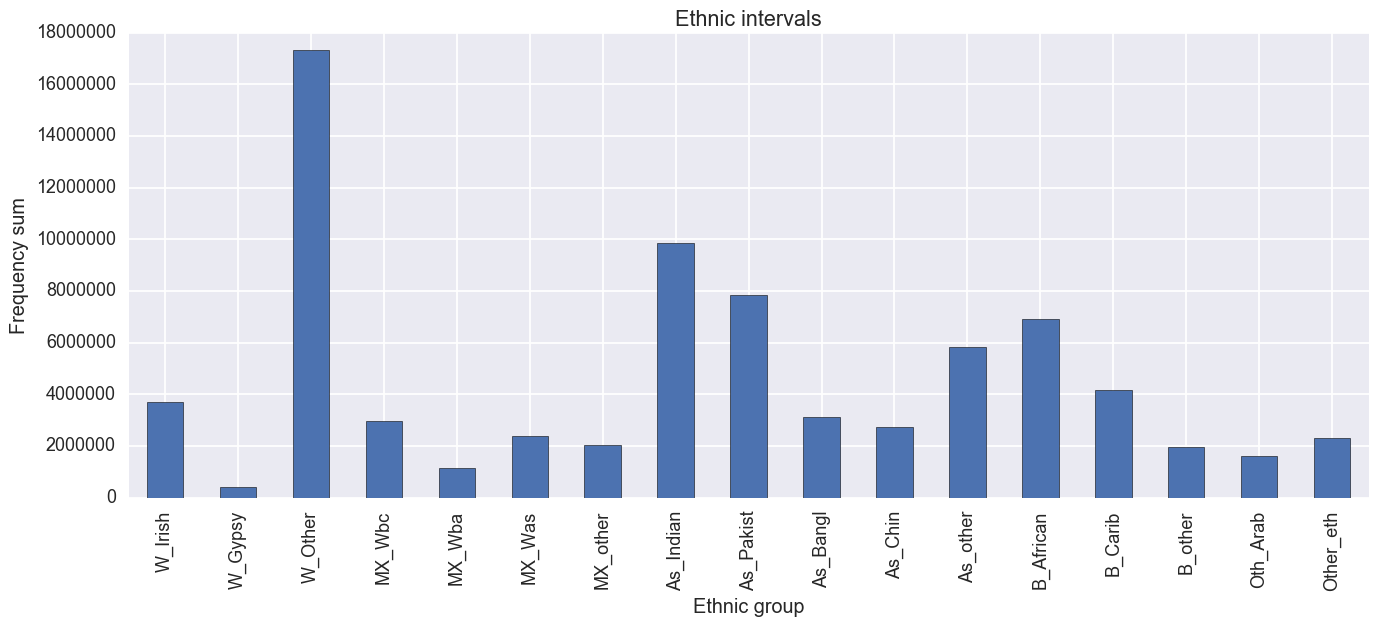

In [5]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(16, 6), dpi=300)
plt.xlabel('Ethnic group')
plt.ylabel('Frequency sum')
plt.title('Ethnic intervals')
plt.ticklabel_format(style='plain', axis='y')

ethnic.sum().plot(kind='bar')

* Column "All_categ" and "W_British" removed from plot, total distorcing distribution

**Ethnic groups (count) in function of frequency sum with white (W_British)**

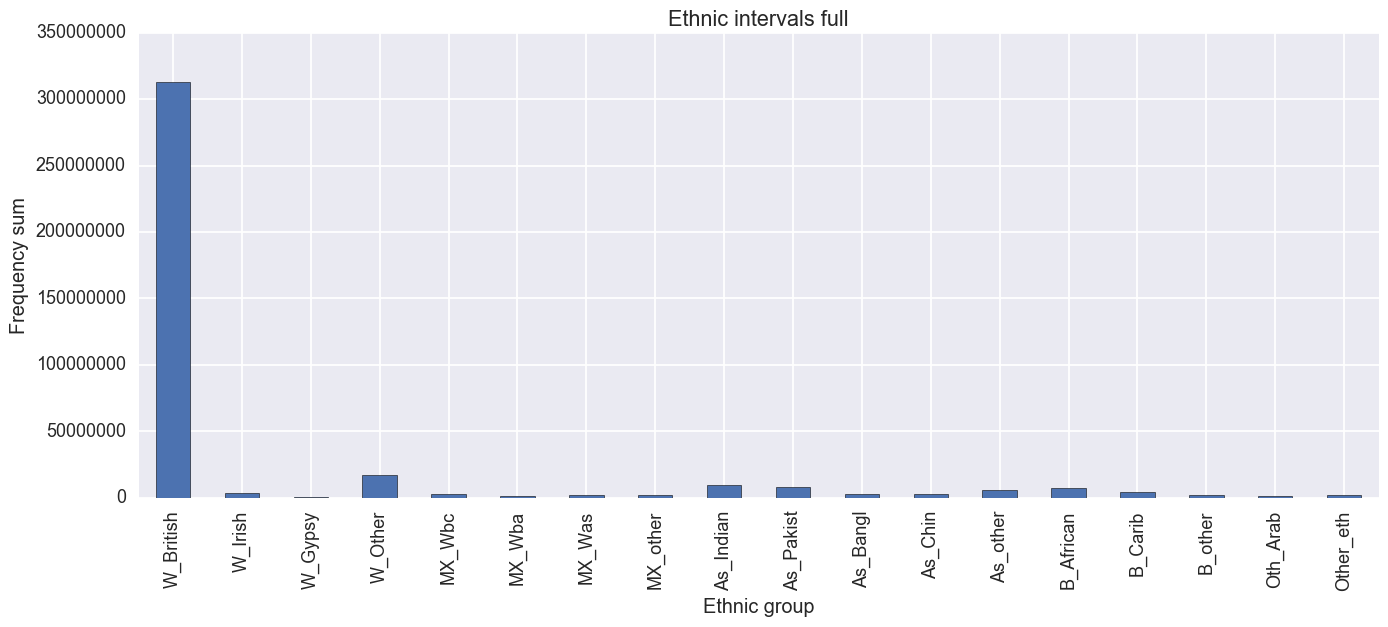

In [6]:
% matplotlib inline

# slice ethnic columns and sum each column
ethnic_full = dfce.loc[:,'W_British':'Other_eth']

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(16, 6), dpi=300)
plt.xlabel('Ethnic group')
plt.ylabel('Frequency sum')
plt.title('Ethnic intervals full')
plt.ticklabel_format(style='plain', axis='y')

ethnic_full.sum().plot(kind='bar')

### Pearson Correlation

This data frame selects data from **brute groups counts** as a test for comparision with proportion data

In [7]:
# Slice dataframe to get counts columns
cor_mat_count = ethnic_full.corr()
cor_mat_count

W_British   W_Irish   W_Gypsy   W_Other    MX_Wbc    MX_Wba  \
W_British   1.000000  0.981370  0.994558  0.968566  0.985074  0.972519   
W_Irish     0.981370  1.000000  0.984941  0.996320  0.996764  0.997882   
W_Gypsy     0.994558  0.984941  1.000000  0.977614  0.985176  0.978485   
W_Other     0.968566  0.996320  0.977614  1.000000  0.990573  0.998671   
MX_Wbc      0.985074  0.996764  0.985176  0.990573  1.000000  0.992662   
MX_Wba      0.972519  0.997882  0.978485  0.998671  0.992662  1.000000   
MX_Was      0.986009  0.998663  0.990394  0.995530  0.997050  0.996420   
MX_other    0.970035  0.997590  0.977392  0.999473  0.992899  0.999438   
As_Indian   0.967968  0.993769  0.971880  0.992051  0.993807  0.992489   
As_Pakist   0.978345  0.980381  0.971509  0.966724  0.986913  0.972286   
As_Bangl    0.942529  0.981804  0.948163  0.984416  0.977201  0.985078   
As_Chin     0.983513  0.998788  0.985685  0.995480  0.996280  0.997727   
As_other    0.956704  0.993147  0.966715  0.997386  0.987247  0.996285   
B_African   0.934869  0.983317  0.945825  0.991545  0.975855  0.990895   
B_Carib     0.931051  0.981024  0.940454  0.987181  0.977326  0.986225   
B_other     0.926533  0.979122  0.936206  0.986655  0.973349  0.985995   
Oth_Arab    0.957109  0.991569  0.961514  0.993724  0.986249  0.994619   
Other_eth   0.946632  0.988904  0.955572  0.994947  0.983216  0.993776   

             MX_Was  MX_other  As_Indian  As_Pakist  As_Bangl   As_Chin  \
W_British  0.986009  0.970035   0.967968   0.978345  0.942529  0.983513   
W_Irish    0.998663  0.997590   0.993769   0.980381  0.981804  0.998788   
W_Gypsy    0.990394  0.977392   0.971880   0.971509  0.948163  0.985685   
W_Other    0.995530  0.999473   0.992051   0.966724  0.984416  0.995480   
MX_Wbc     0.997050  0.992899   0.993807   0.986913  0.977201  0.996280   
MX_Wba     0.996420  0.999438   0.992489   0.972286  0.985078  0.997727   
MX_Was     1.000000  0.996314   0.992489   0.981797  0.977693  0.998613   
MX_other   0.996314  1.000000   0.993692   0.971301  0.986139  0.996801   
As_Indian  0.992489  0.993692   1.000000   0.976445  0.982782  0.992092   
As_Pakist  0.981797  0.971301   0.976445   1.000000  0.960356  0.980849   
As_Bangl   0.977693  0.986139   0.982782   0.960356  1.000000  0.981340   
As_Chin    0.998613  0.996801   0.992092   0.980849  0.981340  1.000000   
As_other   0.991095  0.997791   0.994082   0.964801  0.987370  0.991488   
B_African  0.978797  0.992260   0.985084   0.949064  0.986981  0.981849   
B_Carib    0.975852  0.989088   0.986104   0.952545  0.986227  0.977959   
B_other    0.973340  0.988341   0.983275   0.947061  0.986138  0.976662   
Oth_Arab   0.988480  0.995014   0.990792   0.969947  0.986976  0.991723   
Other_eth  0.985558  0.995561   0.990950   0.959844  0.988570  0.987449   

           As_other  B_African   B_Carib   B_other  Oth_Arab  Other_eth  
W_British  0.956704   0.934869  0.931051  0.926533  0.957109   0.946632  
W_Irish    0.993147   0.983317  0.981024  0.979122  0.991569   0.988904  
W_Gypsy    0.966715   0.945825  0.940454  0.936206  0.961514   0.955572  
W_Other    0.997386   0.991545  0.987181  0.986655  0.993724   0.994947  
MX_Wbc     0.987247   0.975855  0.977326  0.973349  0.986249   0.983216  
MX_Wba     0.996285   0.990895  0.986225  0.985995  0.994619   0.993776  
MX_Was     0.991095   0.978797  0.975852  0.973340  0.988480   0.985558  
MX_other   0.997791   0.992260  0.989088  0.988341  0.995014   0.995561  
As_Indian  0.994082   0.985084  0.986104  0.983275  0.990792   0.990950  
As_Pakist  0.964801   0.949064  0.952545  0.947061  0.969947   0.959844  
As_Bangl   0.987370   0.986981  0.986227  0.986138  0.986976   0.988570  
As_Chin    0.991488   0.981849  0.977959  0.976662  0.991723   0.987449  
As_other   1.000000   0.995363  0.993095  0.992536  0.995620   0.997921  
B_African  0.995363   1.000000  0.996693  0.998117  0.992372   0.997932  
B_Carib    0.993095   0.996693  1.000000  0.999088  0.989941   0.996

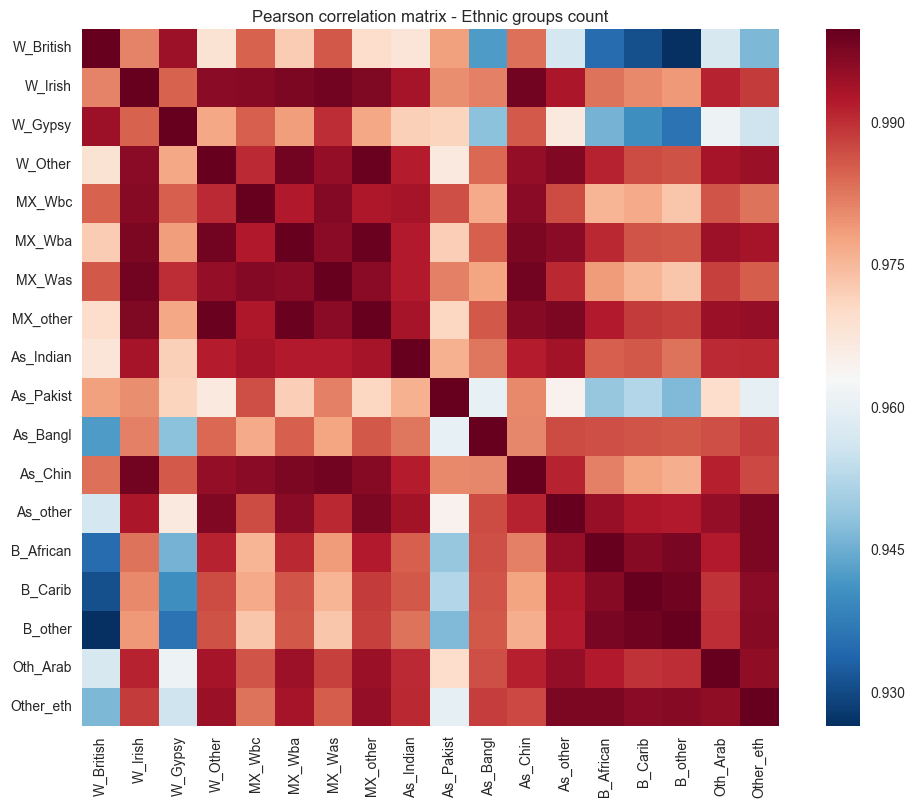

In [8]:
# Plot Heatmap based on cor_mat_count data frame - Counts
% matplotlib inline
sns.set(context="notebook")
f1, ax1 = plt.subplots(figsize=(12, 9))
plt.title('Pearson correlation matrix - Ethnic groups count')
sns.heatmap(cor_mat_count, cmap='RdBu_r', square=True)

This data frame selects columns data with **percentage** for ethnic groups

In [9]:
# Slice data frame to get proportion data columns
ethnic_prop = dfce.loc[:,'W.British':'Other.eth']
cor_mat_prop = ethnic_prop.corr()
cor_mat_prop

W.British   W.Irish   W.Gypsy   W.Other    MX.Wbc    MX.Wba  \
W.British   1.000000 -0.416598 -0.039401 -0.654911 -0.432184 -0.447249   
W.Irish    -0.416598  1.000000 -0.007213  0.407910  0.229113  0.227808   
W.Gypsy    -0.039401 -0.007213  1.000000  0.023304  0.013301  0.022695   
W.Other    -0.654911  0.407910  0.023304  1.000000  0.213992  0.341159   
MX.Wbc     -0.432184  0.229113  0.013301  0.213992  1.000000  0.312991   
MX.Wba     -0.447249  0.227808  0.022695  0.341159  0.312991  1.000000   
MX.Was     -0.454670  0.296334  0.003040  0.394989  0.219420  0.209109   
MX.other   -0.560538  0.354184  0.015881  0.512735  0.344801  0.368770   
As.Indian  -0.573284  0.143131 -0.005595  0.173710  0.106222  0.087651   
As.Pakist  -0.513658  0.048338  0.012242  0.071368  0.110378  0.061079   
As.Bangl   -0.394510  0.055648  0.003328  0.121256  0.094537  0.116060   
As.Chin    -0.371156  0.183249 -0.002201  0.349895  0.115009  0.183422   
As.other   -0.692544  0.271375  0.015648  0.407425  0.208018  0.252723   
B.African  -0.648329  0.228441  0.031801  0.371111  0.405045  0.503350   
B.Carib    -0.639843  0.301191  0.011713  0.344118  0.550241  0.391763   
B.other    -0.621067  0.265037  0.015230  0.337632  0.465137  0.421796   
Oth.Arab   -0.446394  0.216087 -0.001206  0.341997  0.139706  0.222728   
Other.eth  -0.648194  0.288921  0.011880  0.504663  0.267375  0.319325   

             MX.Was  MX.other  As.Indian  As.Pakist  As.Bangl   As.Chin  \
W.British -0.454670 -0.560538  -0.573284  -0.513658 -0.394510 -0.371156   
W.Irish    0.296334  0.354184   0.143131   0.048338  0.055648  0.183249   
W.Gypsy    0.003040  0.015881  -0.005595   0.012242  0.003328 -0.002201   
W.Other    0.394989  0.512735   0.173710   0.071368  0.121256  0.349895   
MX.Wbc     0.219420  0.344801   0.106222   0.110378  0.094537  0.115009   
MX.Wba     0.209109  0.368770   0.087651   0.061079  0.116060  0.183422   
MX.Was     1.000000  0.328862   0.214250   0.168754  0.102157  0.232837   
MX.other   0.328862  1.000000   0.157458   0.087459  0.131260  0.251019   
As.Indian  0.214250  0.157458   1.000000   0.250961  0.115287  0.124572   
As.Pakist  0.168754  0.087459   0.250961   1.000000  0.226540  0.037923   
As.Bangl   0.102157  0.131260   0.115287   0.226540  1.000000  0.085028   
As.Chin    0.232837  0.251019   0.124572   0.037923  0.085028  1.000000   
As.other   0.325203  0.352102   0.491429   0.277994  0.157493  0.258223   
B.African  0.205777  0.437917   0.150148   0.114187  0.186125  0.218587   
B.Carib    0.231851  0.457592   0.203138   0.161775  0.161731  0.136729   
B.other    0.215005  0.450361   0.167802   0.136158  0.183418  0.155944   
Oth.Arab   0.223392  0.283693   0.162126   0.156369  0.117234  0.276864   
Other.eth  0.303715  0.437492   0.320338   0.165773  0.159984  0.237714   

           As.other  B.African   B.Carib   B.other  Oth.Arab  Other.eth  
W.British -0.692544  -0.648329 -0.639843 -0.621067 -0.446394  -0.648194  
W.Irish    0.271375   0.228441  0.301191  0.265037  0.216087   0.288921  
W.Gypsy    0.015648   0.031801  0.011713  0.015230 -0.001206   0.011880  
W.Other    0.407425   0.371111  0.344118  0.337632  0.341997   0.504663  
MX.Wbc     0.208018   0.405045  0.550241  0.465137  0.139706   0.267375  
MX.Wba     0.252723   0.503350  0.391763  0.421796  0.222728   0.319325  
MX.Was     0.325203   0.205777  0.231851  0.215005  0.223392   0.303715  
MX.other   0.352102   0.437917  0.457592  0.450361  0.283693   0.437492  
As.Indian  0.491429   0.150148  0.203138  0.167802  0.162126   0.320338  
As.Pakist  0.277994   0.114187  0.161775  0.136158  0.156369   0.165773  
As.Bangl   0.157493   0.186125  0.161731  0.183418  0.117234   0.159984  
As.Chin    0.258223   0.218587  0.136729  0.155944  0.276864   0.237714  
As.other   1.000000   0.373049  0.358412  0.344821  0.314530   0.457379  
B.African  0.373049   1.000000  0.627765  0.705335  0.248388   0.463365  
B.Carib    0.358412   0.627765  1.000000  0.729509  0.201604   0.441

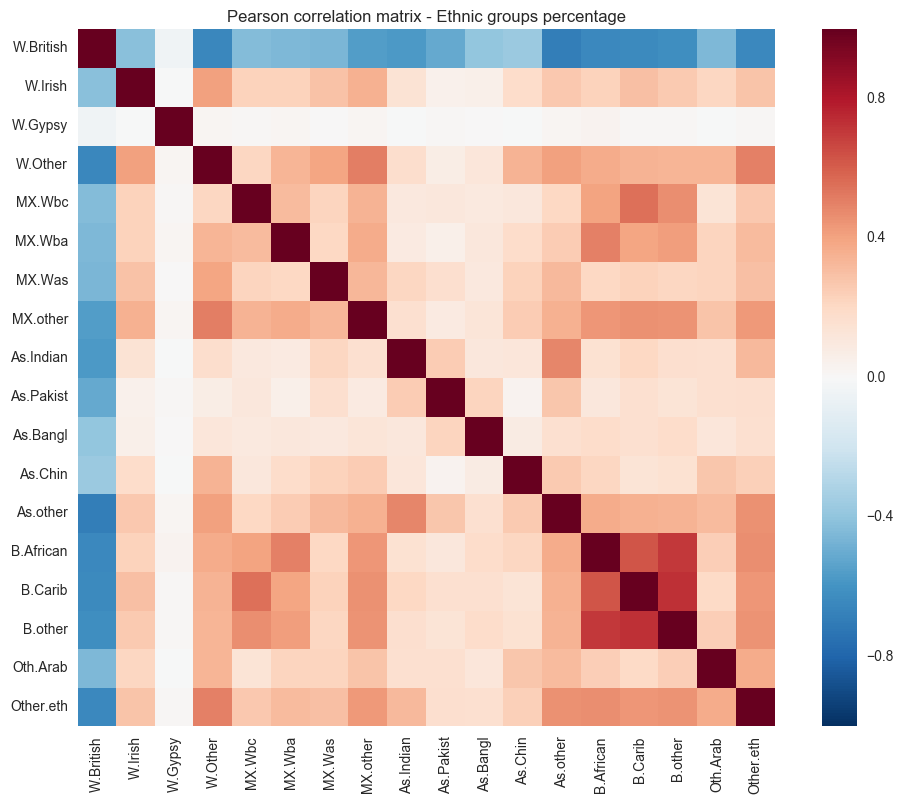

In [10]:
# Plot Heatmap based on cor_mat_prop data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f2, ax2 = plt.subplots(figsize=(12, 9))
plt.title('Pearson correlation matrix - Ethnic groups percentage')
sns.heatmap(cor_mat_prop, square=True)

Heatmap showing a positive correlation for black groups
<prep>
```
Black/African/Caribbean/Black British: African
Black/African/Caribbean/Black British: Caribbean
Black/African/Caribbean/Black British: Other Black
```
<prep>

### Moran I Correlation 

Based on percentage of groups

#### Based on Queen Contiguity Weight

Prepares data reading shape file for OA London and computes Contiguity Based Weights using Queen method

In [12]:
shp_path = "/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
            "London/OA Boundary/resolution_oa_2011_ks201-501ew.shp"
weight_cont = pysal.queen_from_shapefile(shp_path)
# weight_full = weight.full()

('Island id: ', [34622])


**Histogram showing the distribuition of neighbors in queen weight**

<Container object of 29 artists>

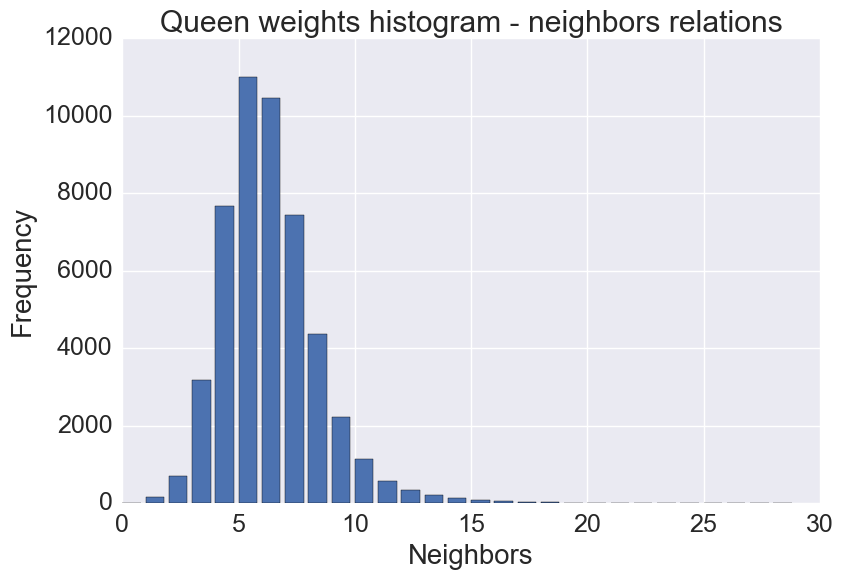

In [26]:
% matplotlib inline
sns.set(context="notebook", font_scale=1.8)
plt.figure(facecolor="white", figsize=(9, 6), dpi=300)
plt.xlabel('Neighbors')
plt.ylabel('Frequency')
plt.title('Queen weights histogram - neighbors relations')
plt.bar(*zip(*weight_cont.histogram))

**Compute Bivariate Moran for all elements of ethnic groups**

Variables are compared pairwised resulting on a matrix

999 random permutations are used for calculation of pseudo p_values

In [14]:
# Read dbf associated with the same shape file
# Obs: QGIS field lenght limit(10) changed column names during join

def calc_moran(arrayi, arrayj, weight):
    moran = pysal.Moran_BV(arrayi, arrayj, weight, permutations=999)
    result = moran.I
    pvalue = moran.p_z_sim
    return result, pvalue


def block_processing(i, weight, varnames, file):
    morans = []
    pvalues = []
    
    for item in varnames:
        j = np.array(file.by_col[item])
        serie = calc_moran(i,j,weight)
        moran = serie[0]
        pvalue = serie[1]
        morans.append(moran)
        pvalues.append(pvalue)
    return morans, pvalues


def calc_moran_matrix(varnames, weight, file):
    moran_matrix = []
    pvalue_matrix = []
    
    for item in varnames:
        i = np.array(file.by_col[item])
        result = block_processing(i,weight, varnames, file)
        res_moran = result[0]
        res_pvalue = result[1]
        moran_matrix.append(res_moran)
        pvalue_matrix.append(res_pvalue)
    return moran_matrix, pvalue_matrix

In [15]:
# Call main function to compute Moran and P-values ethnic groups
f1 = pysal.open("/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
                "London/OA Boundary/resolution_oa_2011_ks201-501ew.dbf")

var_ethnics = list(cor_mat_prop)
matrices_ethnic = calc_moran_matrix(var_ethnics, weight_cont, f1)

('WARNING: ', 34622, ' is an island (no neighbors)')


DataFrame with pairwise results

In [16]:
dfmoran_ethnic = pd.DataFrame(matrices_ethnic[0], columns=var_ethnics, index=var_ethnics)
dfmoran_ethnic

W.British   W.Irish   W.Gypsy   W.Other    MX.Wbc    MX.Wba  \
W.British   0.924502 -0.309150  0.053195 -0.586337 -0.361912 -0.377482   
W.Irish    -0.309540  0.477715 -0.051805  0.364014  0.163274  0.136601   
W.Gypsy     0.049015 -0.049809  0.083740 -0.054131 -0.021128 -0.014602   
W.Other    -0.583260  0.359146 -0.058209  0.800560  0.187701  0.248481   
MX.Wbc     -0.361900  0.166555 -0.023510  0.189780  0.416703  0.270461   
MX.Wba     -0.376093  0.137310 -0.016796  0.248314  0.271030  0.292393   
MX.Was     -0.266011  0.219109 -0.047260  0.320929  0.097067  0.098919   
MX.other   -0.460588  0.263488 -0.041411  0.421104  0.283006  0.268506   
As.Indian  -0.478120  0.083163 -0.030744  0.078661 -0.000713  0.029644   
As.Pakist  -0.412723 -0.001859 -0.019312  0.061611  0.069526  0.053146   
As.Bangl   -0.309026  0.000880 -0.016740  0.091434  0.055569  0.082335   
As.Chin    -0.296581  0.137819 -0.035575  0.339268  0.086623  0.134907   
As.other   -0.560235  0.159080 -0.033927  0.253045  0.120865  0.140330   
B.African  -0.550139  0.096214  0.003226  0.246166  0.378339  0.397789   
B.Carib    -0.574670  0.191401 -0.019751  0.279462  0.486336  0.356536   
B.other    -0.559574  0.182359 -0.017846  0.281438  0.420251  0.359315   
Oth.Arab   -0.380728  0.206970 -0.030130  0.374628  0.069219  0.146249   
Other.eth  -0.556008  0.208549 -0.032928  0.467574  0.208617  0.247398   

             MX.Was  MX.other  As.Indian  As.Pakist  As.Bangl   As.Chin  \
W.British -0.269071 -0.461911  -0.478251  -0.415297 -0.308498 -0.299085   
W.Irish    0.221417  0.262937   0.083970  -0.000555  0.001589  0.138881   
W.Gypsy   -0.043747 -0.038176  -0.028950  -0.017349 -0.016996 -0.035035   
W.Other    0.322026  0.419279   0.079370   0.062465  0.087596  0.341888   
MX.Wbc     0.099473  0.285029  -0.000842   0.070437  0.057097  0.086795   
MX.Wba     0.100656  0.270845   0.029458   0.053985  0.082120  0.136880   
MX.Was     0.233785  0.205264   0.107276   0.044242  0.029212  0.159833   
MX.other   0.207810  0.366677   0.068155   0.050717  0.084839  0.200462   
As.Indian  0.107388  0.067406   0.831850   0.386070  0.075672  0.048817   
As.Pakist  0.042434  0.049934   0.383798   0.793697  0.163572 -0.013589   
As.Bangl   0.030425  0.083978   0.076121   0.163722  0.753039  0.111666   
As.Chin    0.158910  0.198071   0.049767  -0.012004  0.105250  0.445302   
As.other   0.173209  0.197497   0.508438   0.315732  0.071826  0.148334   
B.African  0.051927  0.321798   0.067287   0.104334  0.120449  0.160783   
B.Carib    0.107851  0.379673   0.098461   0.152590  0.085410  0.090458   
B.other    0.101316  0.367061   0.098643   0.110360  0.115130  0.130285   
Oth.Arab   0.164317  0.216031   0.136717   0.075353  0.066955  0.190464   
Other.eth  0.196997  0.339114   0.207437   0.124539  0.100934  0.184684   

           As.other  B.African   B.Carib   B.other  Oth.Arab  Other.eth  
W.British -0.561773  -0.546461 -0.571351 -0.556813 -0.379480  -0.553760  
W.Irish    0.160379   0.092000  0.186593  0.178738  0.208611   0.209993  
W.Gypsy   -0.030341   0.004038 -0.017588 -0.015177 -0.027478  -0.029895  
W.Other    0.254006   0.242187  0.274824  0.276247  0.371882   0.462842  
MX.Wbc     0.120379   0.374241  0.483888  0.418883  0.069748   0.210139  
MX.Wba     0.139657   0.394327  0.354135  0.355874  0.144838   0.246030  
MX.Was     0.170483   0.048482  0.103211  0.098345  0.163100   0.194170  
MX.other   0.198296   0.316584  0.375113  0.363332  0.212747   0.336844  
As.Indian  0.508425   0.067738  0.097604  0.099871  0.138056   0.203937  
As.Pakist  0.313776   0.103334  0.149272  0.107579  0.074797   0.123652  
As.Bangl   0.071452   0.118747  0.083098  0.112751  0.066352   0.099844  
As.Chin    0.150948   0.158228  0.090396  0.127342  0.186619   0.184046  
As.other   0.682933   0.210853  0.230871  0.227541  0.254067   0.302309  
B.African  0.213592   0.736707  0.544018  0.570517  0.132233   0.341836  
B.Carib    0.232733   0.541035  0.778648  0.640852  0.132300   0.348

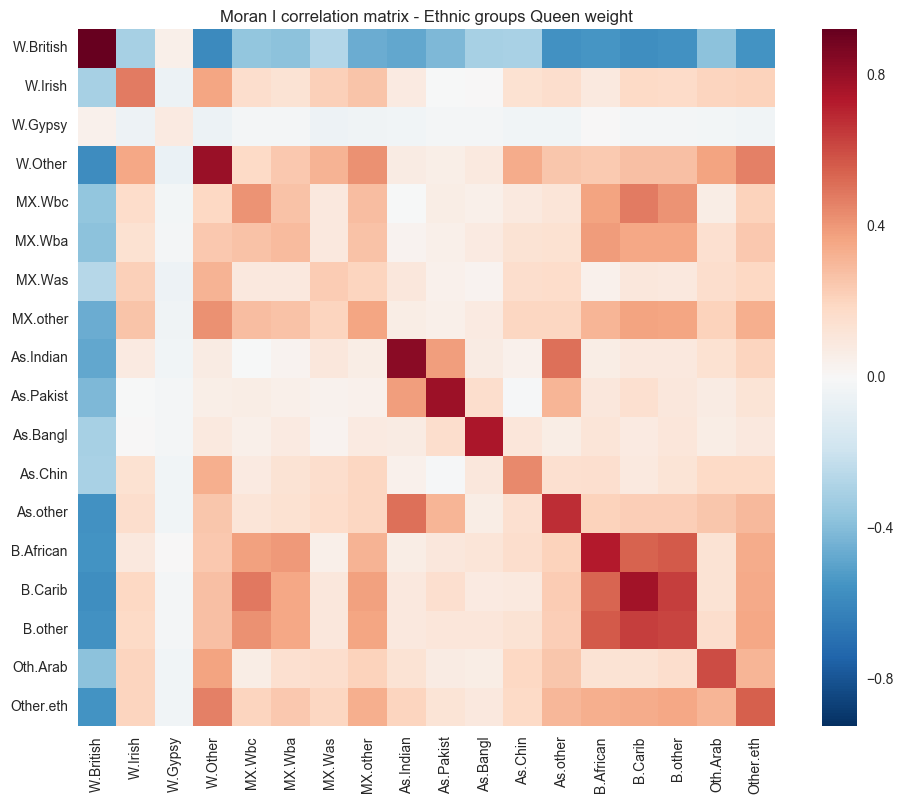

In [17]:
# Plot Heatmap based on dfmoran data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f3, ax3 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Ethnic groups Queen weight')
sns.heatmap(dfmoran_ethnic, square=True)

Heatmap showing a positive correlation for black groups
as could be seen in the Pearson correlation


**P-values obtained from previous map**

In [18]:
dfpvalue_ethnic = pd.DataFrame(matrices_ethnic[1], columns=var_ethnics, index=var_ethnics)
dfpvalue_ethnic

W.British        W.Irish       W.Gypsy        W.Other  \
W.British        0.0   0.000000e+00  0.000000e+00   0.000000e+00   
W.Irish          0.0   0.000000e+00  1.927303e-46   0.000000e+00   
W.Gypsy          0.0  8.236949e-118  0.000000e+00  4.912385e-141   
W.Other          0.0   0.000000e+00  2.230653e-39   0.000000e+00   
MX.Wbc           0.0   0.000000e+00  2.150292e-12   0.000000e+00   
MX.Wba           0.0   0.000000e+00  3.646529e-08   0.000000e+00   
MX.Was           0.0   0.000000e+00  1.305311e-64   0.000000e+00   
MX.other         0.0   0.000000e+00  1.299274e-35   0.000000e+00   
As.Indian        0.0   0.000000e+00  1.367991e-12   0.000000e+00   
As.Pakist        0.0   3.432968e-01  4.413509e-06   0.000000e+00   
As.Bangl         0.0   4.187241e-01  2.086082e-04   0.000000e+00   
As.Chin          0.0   0.000000e+00  5.785345e-29   0.000000e+00   
As.other         0.0   0.000000e+00  1.032180e-16   0.000000e+00   
B.African        0.0   0.000000e+00  1.996966e-01   0.000000e+00   
B.Carib          0.0   0.000000e+00  1.590715e-06   0.000000e+00   
B.other          0.0   0.000000e+00  9.686165e-06   0.000000e+00   
Oth.Arab         0.0   0.000000e+00  8.001403e-15   0.000000e+00   
Other.eth        0.0   0.000000e+00  5.706381e-19   0.000000e+00   

                 MX.Wbc        MX.Wba        MX.Was      MX.other  \
W.British  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
W.Irish    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
W.Gypsy    1.160485e-22  7.890614e-12  7.274494e-88  4.454816e-70   
W.Other    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
MX.Wbc     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
MX.Wba     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
MX.Was     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
MX.other   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
As.Indian  4.193122e-01  2.246214e-11  0.000000e+00  0.000000e+00   
As.Pakist  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
As.Bangl   0.000000e+00  0.000000e+00  7.316370e-13  0.000000e+00   
As.Chin    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
As.other   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
B.African  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
B.Carib    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
B.other    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Oth.Arab   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Other.eth  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

              As.Indian     As.Pakist      As.Bangl       As.Chin  \
W.British  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
W.Irish    0.000000e+00  4.466271e-01  3.431601e-01  0.000000e+00   
W.Gypsy    6.372987e-41  4.424883e-16  2.199262e-15  1.408043e-58   
W.Other    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
MX.Wbc     4.103320e-01  0.000000e+00  0.000000e+00  0.000000e+00   
MX.Wba     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
MX.Was     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
MX.other   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
As.Indian  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
As.Pakist  0.000000e+00  0.000000e+00  0.000000e+00  1.003213e-03   
As.Bangl   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
As.Chin    0.000000e+00  2.406873e-04  0.000000e+00  0.000000e+00   
As.other   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
B.African  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
B.Carib    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
B.other    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Oth.Arab   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Other.eth  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

               As.other  B.African       B.Carib       B.other      Oth.Arab  \
W.British  0.0

#### Based on Kernel Weight

Weight computed using a 700m Kernel function with a gaussian form

In [19]:
# weight based on distance
shp_path2 = "/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
            "London/OA Boundary/resolution_oa_2011_ks201-501ew_cent.shp"

points = get_points_array_from_shapefile(shp_path2)
# 700m bandwdth with gaussian kernel function
weight_dist = pysal.Kernel(points, bandwidth=700.0, function='gaussian')

**Histogram showing the distribuition of neighbors in 700m kernel weight**

<Container object of 132 artists>

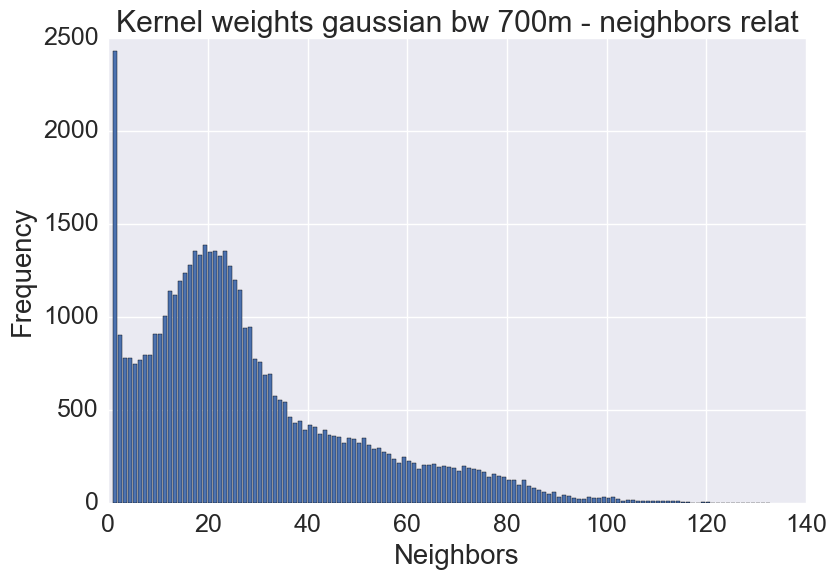

In [32]:
% matplotlib inline
sns.set(context="notebook", font_scale=1.8)
plt.figure(facecolor="white", figsize=(9, 6), dpi=300)
plt.xlabel('Neighbors')
plt.ylabel('Frequency')
plt.title('Kernel weights gaussian bw 700m - neighbors rel.')
plt.bar(*zip(*weight_dist.histogram))

In [33]:
# Call main function to compute Moran and P-values ethnic groups for 700m
var_ethnics = list(cor_mat_prop)
matrices_ethnic_dist = calc_moran_matrix(var_ethnics, weight_dist, f1)

In [34]:
dfmoran_ethnic_dist = pd.DataFrame(matrices_ethnic_dist[0], columns=var_ethnics, index=var_ethnics)
dfmoran_ethnic_dist

W.British   W.Irish   W.Gypsy   W.Other    MX.Wbc    MX.Wba  \
W.British   0.911943 -0.319123  0.041315 -0.586581 -0.357425 -0.367838   
W.Irish    -0.320015  0.498589 -0.048639  0.362157  0.167950  0.141971   
W.Gypsy     0.040780 -0.049345  0.504399 -0.054550 -0.020825 -0.011554   
W.Other    -0.587221  0.362353 -0.054481  0.777978  0.195413  0.252771   
MX.Wbc     -0.358686  0.167048 -0.021133  0.195717  0.426971  0.257140   
MX.Wba     -0.368095  0.142099 -0.011447  0.252347  0.256940  0.307668   
MX.Was     -0.276109  0.216512 -0.043649  0.313282  0.102415  0.105275   
MX.other   -0.459397  0.263451 -0.037342  0.417955  0.277669  0.259965   
As.Indian  -0.473887  0.085032 -0.030193  0.077598  0.008406  0.034980   
As.Pakist  -0.405016  0.002088 -0.018604  0.065232  0.072274  0.055192   
As.Bangl   -0.300377  0.007105 -0.016533  0.103360  0.054291  0.077971   
As.Chin    -0.292610  0.141672 -0.034519  0.326118  0.090585  0.136685   
As.other   -0.549319  0.162469 -0.030444  0.251615  0.120906  0.138006   
B.African  -0.531531  0.107466  0.001752  0.258355  0.356181  0.368867   
B.Carib    -0.564307  0.192945 -0.018890  0.286151  0.467496  0.344385   
B.other    -0.544561  0.189878 -0.017247  0.291246  0.399701  0.339039   
Oth.Arab   -0.369911  0.213587 -0.027826  0.385506  0.065141  0.134161   
Other.eth  -0.545648  0.219314 -0.031602  0.469956  0.203980  0.234715   

             MX.Was  MX.other  As.Indian  As.Pakist  As.Bangl   As.Chin  \
W.British -0.274356 -0.459438  -0.474350  -0.404861 -0.302484 -0.290658   
W.Irish    0.215820  0.264371   0.085342   0.002815  0.008709  0.140904   
W.Gypsy   -0.044028 -0.037365  -0.029868  -0.018532 -0.016508 -0.034191   
W.Other    0.311893  0.418879   0.077577   0.064324  0.106944  0.325452   
MX.Wbc     0.100874  0.277558   0.008673   0.073724  0.055478  0.089149   
MX.Wba     0.104185  0.259963   0.035569   0.055434  0.079252  0.134645   
MX.Was     0.286928  0.208914   0.107878   0.044729  0.040211  0.158269   
MX.other   0.206923  0.392189   0.069880   0.052944  0.087922  0.197005   
As.Indian  0.107620  0.070366   0.809062   0.377552  0.078967  0.042034   
As.Pakist  0.044367  0.052977   0.377414   0.757128  0.161118 -0.013277   
As.Bangl   0.039048  0.086554   0.079330   0.160078  0.695168  0.120596   
As.Chin    0.157801  0.199058   0.041235  -0.014333  0.125008  0.424740   
As.other   0.172130  0.196202   0.501938   0.304620  0.073223  0.138377   
B.African  0.064696  0.311646   0.077724   0.106553  0.112429  0.160682   
B.Carib    0.113448  0.373162   0.104597   0.150699  0.082086  0.093927   
B.other    0.111541  0.358489   0.107391   0.110320  0.108239  0.131618   
Oth.Arab   0.166346  0.211437   0.137450   0.072115  0.063784  0.178157   
Other.eth  0.197457  0.333634   0.206033   0.120453  0.099298  0.177739   

           As.other  B.African   B.Carib   B.other  Oth.Arab  Other.eth  
W.British -0.549457  -0.531643 -0.564134 -0.545539 -0.368304  -0.545848  
W.Irish    0.162289   0.108557  0.194727  0.191624  0.211588   0.218284  
W.Gypsy   -0.030107   0.002858 -0.018475 -0.016554 -0.027718  -0.030914  
W.Other    0.251019   0.259501  0.286786  0.292626  0.382493   0.469680  
MX.Wbc     0.121235   0.357526  0.469335  0.401200  0.065379   0.204894  
MX.Wba     0.138245   0.368855  0.344535  0.339472  0.134061   0.235078  
MX.Was     0.173007   0.065906  0.114706  0.113010  0.165792   0.198239  
MX.other   0.195897   0.312880  0.374289  0.359531  0.209758   0.333349  
As.Indian  0.501713   0.076781  0.104017  0.107175  0.137001   0.205356  
As.Pakist  0.305179   0.105936  0.149498  0.110200  0.072273   0.120689  
As.Bangl   0.073028   0.111727  0.081320  0.108561  0.062488   0.098947  
As.Chin    0.138606   0.163377  0.095083  0.133696  0.178498   0.178537  
As.other   0.658588   0.206564  0.228080  0.223621  0.242297   0.295592  
B.African  0.207375   0.681165  0.518264  0.530928  0.119348   0.325217  
B.Carib    0.228359   0.518605  0.755172  0.614793  0.127373   0.341

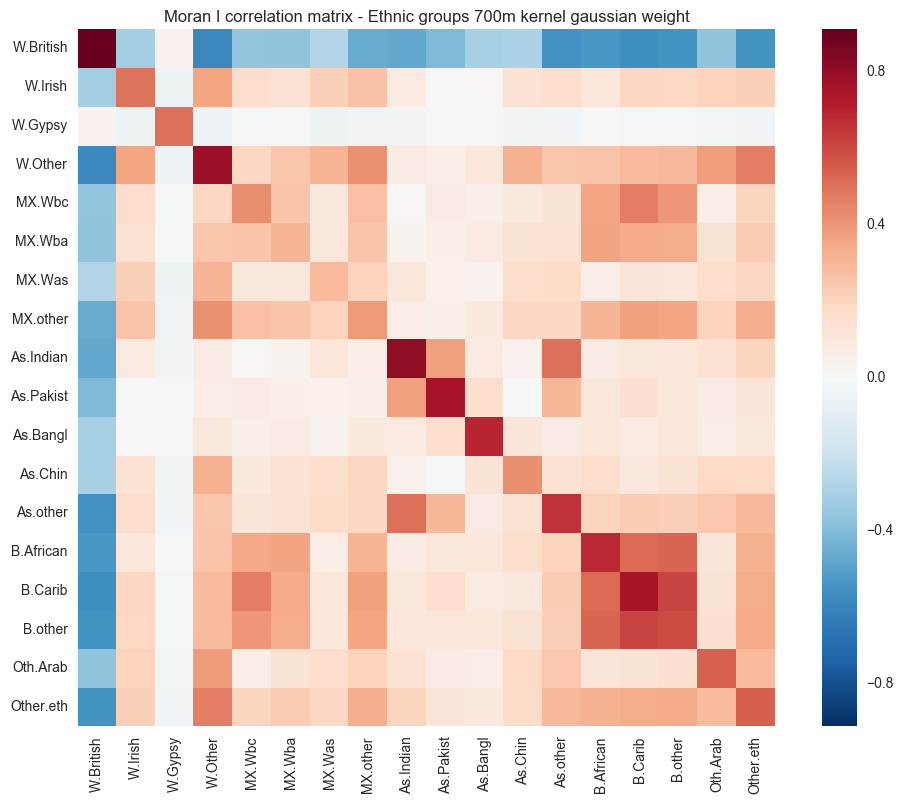

In [35]:
# Plot Heatmap based on dfmoran_ethnic_dist data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f3, ax3 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Ethnic groups 700m kernel gaussian weight')
sns.heatmap(dfmoran_ethnic_dist, square=True)

**Histogram showing the distribuition of neighbors in 2000m kernel weight**

In [36]:
# 2000m bandwdth with gaussian kernel function
weight_dist2k = pysal.Kernel(points, bandwidth=2000.0, function='gaussian')

<Container object of 671 artists>

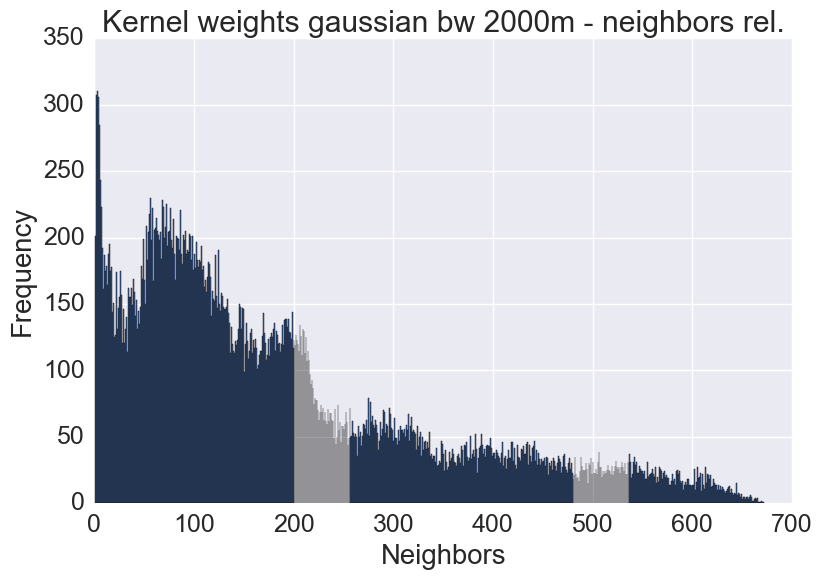

In [46]:
% matplotlib inline
sns.set(context="notebook", font_scale=1.8)
plt.figure(facecolor="white", figsize=(9, 6), dpi=300)
plt.xlabel('Neighbors')
plt.ylabel('Frequency')
plt.title('Kernel weights gaussian bw 2000m - neighbors rel.')
plt.bar(*zip(*weight_dist2k.histogram))

In [38]:
# Call main function to compute Moran and P-values ethnic groups for 2000m
matrices_ethnic_dist2k = calc_moran_matrix(var_ethnics, weight_dist2k, f1)

In [39]:
dfmoran_ethnic_dist2k = pd.DataFrame(matrices_ethnic_dist2k[0], columns=var_ethnics, index=var_ethnics)
dfmoran_ethnic_dist2k

W.British   W.Irish   W.Gypsy   W.Other    MX.Wbc    MX.Wba  \
W.British   0.852229 -0.330974  0.046857 -0.564698 -0.338213 -0.345740   
W.Irish    -0.333140  0.406605 -0.044742  0.362964  0.166006  0.145675   
W.Gypsy     0.051774 -0.048084  0.128949 -0.054038 -0.025266 -0.018386   
W.Other    -0.565571  0.362453 -0.049684  0.698873  0.199341  0.248924   
MX.Wbc     -0.341612  0.164463 -0.023823  0.201263  0.338186  0.224419   
MX.Wba     -0.346635  0.144339 -0.015853  0.248088  0.223193  0.233094   
MX.Was     -0.274404  0.209210 -0.038547  0.296456  0.108726  0.110369   
MX.other   -0.441703  0.259135 -0.036200  0.403138  0.255570  0.240503   
As.Indian  -0.438673  0.099644 -0.024615  0.080439  0.031305  0.053745   
As.Pakist  -0.359379  0.016579 -0.016904  0.067969  0.080088  0.059457   
As.Bangl   -0.276942  0.021782 -0.014098  0.120142  0.059579  0.081815   
As.Chin    -0.271885  0.149335 -0.030952  0.291688  0.097943  0.133693   
As.other   -0.500275  0.175655 -0.030217  0.245913  0.118380  0.135944   
B.African  -0.489661  0.122705 -0.003613  0.260631  0.308868  0.313776   
B.Carib    -0.529605  0.196557 -0.021662  0.295384  0.415339  0.308327   
B.other    -0.508047  0.197322 -0.019775  0.299990  0.351467  0.298780   
Oth.Arab   -0.346761  0.217614 -0.027677  0.378089  0.062310  0.122209   
Other.eth  -0.516936  0.232299 -0.027937  0.457332  0.195524  0.223637   

             MX.Was  MX.other  As.Indian  As.Pakist  As.Bangl   As.Chin  \
W.British -0.271884 -0.440640  -0.438672  -0.358285 -0.280742 -0.268477   
W.Irish    0.208035  0.259425   0.098694   0.018681  0.023887  0.149520   
W.Gypsy   -0.041117 -0.039512  -0.026338  -0.018404 -0.015248 -0.033048   
W.Other    0.295449  0.403456   0.079955   0.064542  0.124391  0.291277   
MX.Wbc     0.107460  0.256110   0.031368   0.083664  0.063038  0.096840   
MX.Wba     0.108606  0.240303   0.054105   0.060201  0.084496  0.130969   
MX.Was     0.210499  0.200791   0.104923   0.044440  0.046689  0.141028   
MX.other   0.199443  0.336419   0.077633   0.055643  0.096074  0.184864   
As.Indian  0.104436  0.077609   0.686735   0.340649  0.076717  0.032222   
As.Pakist  0.044358  0.055954   0.341295   0.597231  0.142540 -0.010075   
As.Bangl   0.045105  0.093961   0.077159   0.140598  0.544514  0.132565   
As.Chin    0.139941  0.186592   0.031220  -0.011638  0.139468  0.291593   
As.other   0.170625  0.188254   0.460708   0.266600  0.070893  0.120465   
B.African  0.079953  0.288154   0.100787   0.112050  0.123559  0.155070   
B.Carib    0.126216  0.352093   0.115501   0.146477  0.088872  0.105489   
B.other    0.124318  0.335293   0.120793   0.106147  0.110594  0.137125   
Oth.Arab   0.166095  0.202597   0.137064   0.064038  0.057198  0.162605   
Other.eth  0.198742  0.321402   0.193297   0.107940  0.104890  0.170139   

           As.other  B.African   B.Carib   B.other  Oth.Arab  Other.eth  
W.British -0.500128  -0.489549 -0.529848 -0.510218 -0.346718  -0.518793  
W.Irish    0.174593   0.126277  0.199046  0.200276  0.218212   0.232649  
W.Gypsy   -0.032857  -0.006482 -0.024436 -0.022530 -0.029581  -0.030735  
W.Other    0.244472   0.263391  0.295701  0.302568  0.378027   0.459752  
MX.Wbc     0.118848   0.311626  0.418327  0.354640  0.063625   0.197813  
MX.Wba     0.136793   0.314977  0.308984  0.300372  0.122431   0.224891  
MX.Was     0.170617   0.083014  0.128634  0.127621  0.166167   0.200163  
MX.other   0.187924   0.290212  0.353596  0.337643  0.202529   0.322882  
As.Indian  0.460667   0.099695  0.116434  0.121873  0.137327   0.192792  
As.Pakist  0.267655   0.110228  0.144984  0.106196  0.065378   0.109243  
As.Bangl   0.070420   0.120095  0.086944  0.109509  0.055437   0.104394  
As.Chin    0.120932   0.160567  0.108160  0.141692  0.163345   0.172460  
As.other   0.527028   0.192787  0.216684  0.209951  0.223773   0.270960  
B.African  0.195450   0.558644  0.453919  0.453628  0.105486   0.302966  
B.Carib    0.215270   0.454013  0.656775  0.543845  0.123637   0.323

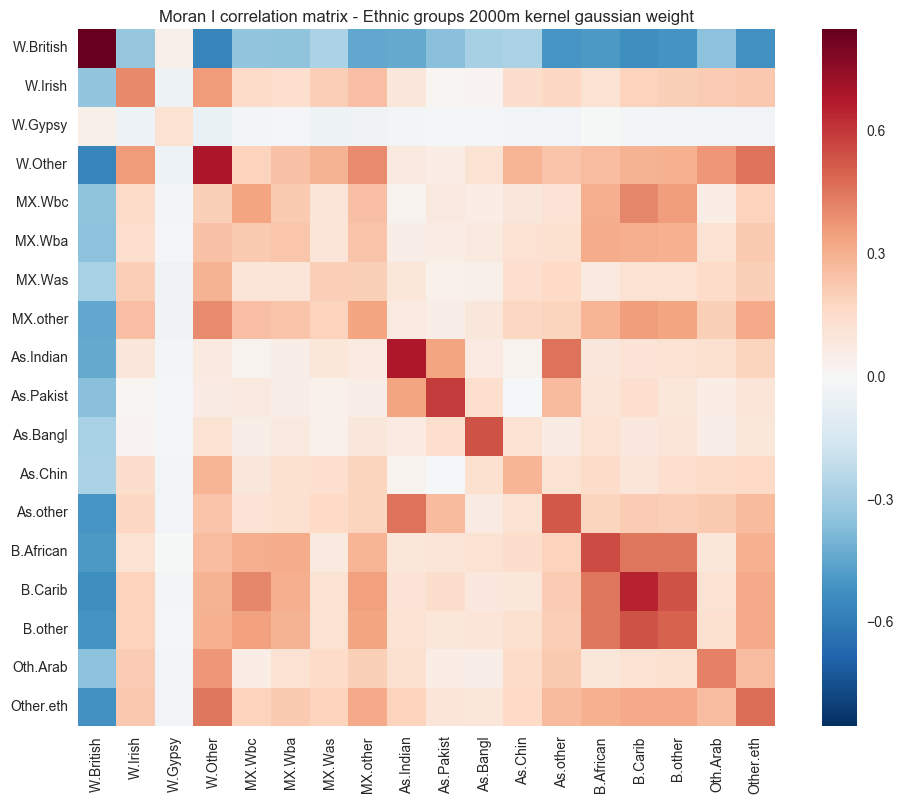

In [40]:
# Plot Heatmap based on dfmoran_ethnic_dist2k data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f3, ax3 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Ethnic groups 2000m kernel gaussian weight')
sns.heatmap(dfmoran_ethnic_dist2k, square=True)

## Qualification groups 

### Histograms

**Count in function of frequency sum**

In [48]:
# Build Census Qualification dataframe reading csv file
dataq = "~/Dropbox/Resolution - SP London/Data/Census/London/Census data for Segregation/"\
        "ks501ew_2011_oa_Qualifications/KS501EWDATA.csv"
dfcq = pd.read_csv(dataq)
dfcq.head()

FileNotFoundError: File b'/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Census/London/Census data for Segregation/ks501ew_2011_oa_Qualifications/KS501EWDATA.csv' does not exist

In [110]:
# slice qualifications columns and sum each column
qualif = dfcq.loc[:,'No_quals':'FTs_18-74I']
qualif.sum()

No_quals      71500772
Level_1       41998745
Level_2       48175212
_Apprent      11323596
Level_3       39016443
Level_4+      86070223
Other_qua     17885309
FTs_16-17      8545356
FTs_18+       17258203
FTs_18-74E     5812630
FTs_18-74U     1527054
FTs_18-74I     9866437
dtype: int64

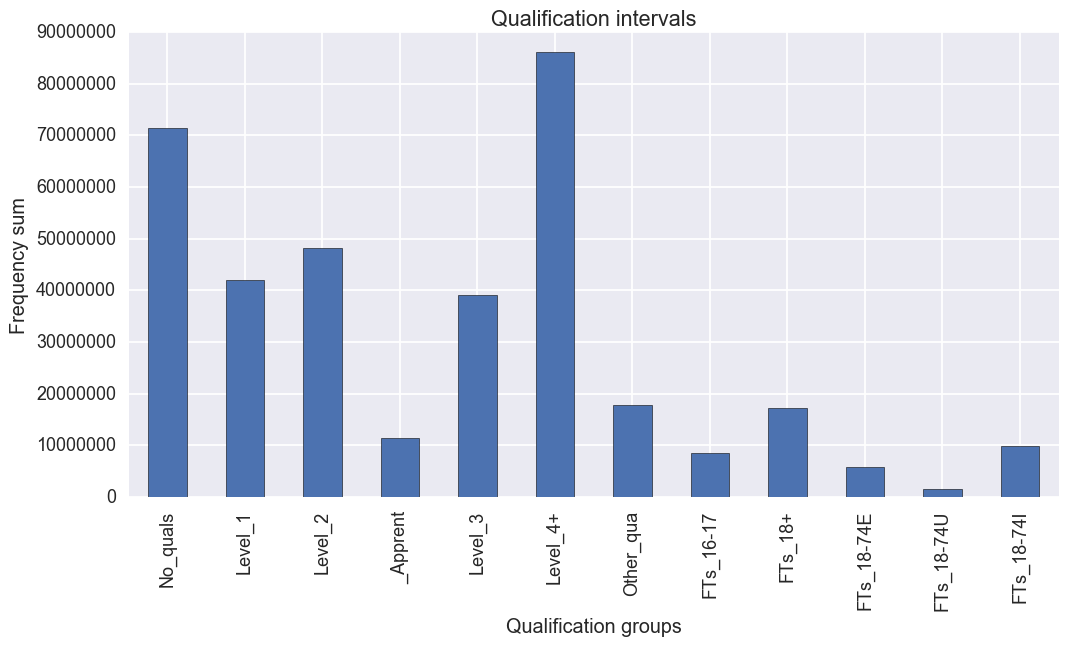

In [111]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 6), dpi=300)
plt.xlabel('Qualification groups')
plt.ylabel('Frequency sum')
plt.title('Qualification intervals')
plt.ticklabel_format(style='plain', axis='y')

qualif.sum().plot(kind='bar')

* Column "All_categ" removed from prot, total

### Pearson Correlation
This data frame selects columns data with percentage for qualification groups

In [112]:
# Slice data frame to get proportion data columns
quali_prop = dfcq.loc[:,'No.quals':'FTs.18-74I']
cor_quali_prop = quali_prop.corr()
cor_quali_prop

No.quals   Level.1   Level.2  .Apprent   Level.3  Level.4+  \
No.quals    1.000000  0.368072  0.013388  0.111881 -0.372750 -0.799109   
Level.1     0.368072  1.000000  0.468133  0.220845 -0.142664 -0.687612   
Level.2     0.013388  0.468133  1.000000  0.329572  0.014415 -0.399411   
.Apprent    0.111881  0.220845  0.329572  1.000000 -0.020037 -0.292839   
Level.3    -0.372750 -0.142664  0.014415 -0.020037  1.000000  0.021294   
Level.4+   -0.799109 -0.687612 -0.399411 -0.292839  0.021294  1.000000   
Other.qua   0.004163 -0.114188 -0.356044 -0.380039 -0.153192 -0.010232   
FTs.16-17   0.023252  0.226889  0.312414 -0.026352 -0.070705 -0.139873   
FTs.18+    -0.216371 -0.286014 -0.323565 -0.331247  0.693267  0.092451   
FTs.18-74E -0.232257 -0.236166 -0.255317 -0.280369  0.621128  0.091671   
FTs.18-74U -0.076092 -0.140278 -0.215461 -0.277947  0.492188 -0.037611   
FTs.18-74I -0.209724 -0.295760 -0.329546 -0.321206  0.674745  0.103979   

            Other.qua  FTs.16-17   FTs.18+  FTs.18-74E  FTs.18-74U  FTs.18-74I  
No.quals     0.004163   0.023252 -0.216371   -0.232257   -0.076092   -0.209724  
Level.1     -0.114188   0.226889 -0.286014   -0.236166   -0.140278   -0.295760  
Level.2     -0.356044   0.312414 -0.323565   -0.255317   -0.215461   -0.329546  
.Apprent    -0.380039  -0.026352 -0.331247   -0.280369   -0.277947   -0.321206  
Level.3     -0.153192  -0.070705  0.693267    0.621128    0.492188    0.674745  
Level.4+    -0.010232  -0.139873  0.092451    0.091671   -0.037611    0.103979  
Other.qua    1.000000  -0.029663  0.237089    0.226080    0.264273    0.209489  
FTs.16-17   -0.029663   1.000000 -0.078037   -0.076758   -0.035945   -0.076448  
FTs.18+      0.237089  -0.078037  1.000000    0.862780    0.763583    0.976073  
FTs.18-74E   0.226080  -0.076758  0.862780    1.000000    0.660677    0.746564  
FTs.18-74U   0.264273  -0.035945  0.763583    0.660677    1.000000    0.676062  
FTs.18-74I   0.209489  -0.076448  0.976073    0.746564    0.676062    1.000000

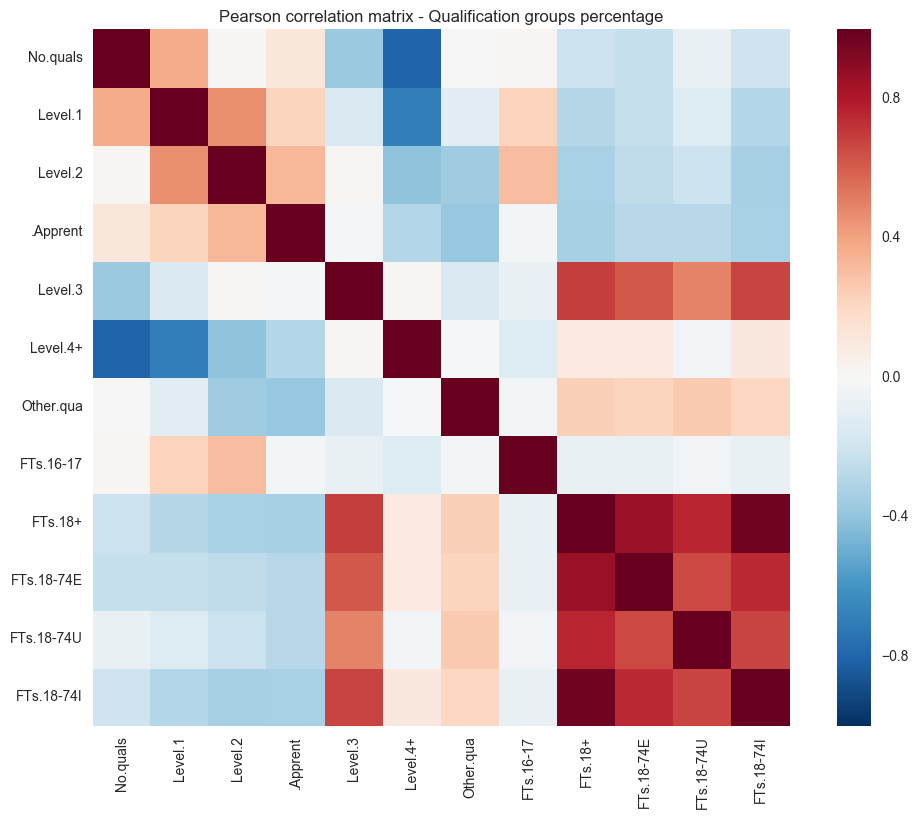

In [113]:
# Plot Heatmap based on cor_mat_prop data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f4, ax4 = plt.subplots(figsize=(12, 9))
plt.title('Pearson correlation matrix - Qualification groups percentage')
sns.heatmap(cor_quali_prop, square=True)

### Moran I Correlation

Based on percentage of groups

#### Based on Queen Contiguity Weight

Prepares data reading shape file for OA London and computes Contiguity Based Weights using Queen method

In [47]:
# Call main function to compute Moran and P-values for qualification groups
var_quali = list(cor_quali_prop)
matrices_quali = calc_moran_matrix(var_quali, weight_cont, f1)

NameError: name 'cor_quali_prop' is not defined

DataFrame with pairwise results

In [ ]:
dfmoran_quali = pd.DataFrame(matrices_quali[0], columns=var_quali, index=var_quali)
dfmoran_quali

In [ ]:
# Plot Heatmap based on dfmoran_quali data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f5, ax5 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Qualification groups Queen weight')
sns.heatmap(dfmoran_quali, square=True)

P-values obtained from previous map

In [ ]:
dfpvalue_quali = pd.DataFrame(matrices_quali[1], columns=var_quali, index=var_quali)
dfpvalue_quali

#### Based on Kernel Weight

Weight computed using a 700m Kernel function with a gaussian form

In [ ]:
# Call main function to compute Moran and P-values qualification groups
matrices_quali_dist = calc_moran_matrix(var_quali, weight_dist, f1)

In [ ]:
dfmoran_quali_dist = pd.DataFrame(matrices_quali_dist[0], columns=var_quali, index=var_quali)
dfmoran_quali_dist

In [ ]:
# Plot Heatmap based on dfmoran data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f3, ax3 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Qualification groups 700m kernel gaussian weight')
sns.heatmap(dfmoran_quali_dist, square=True)

In [ ]:
# Call main function to compute Moran and P-values qualification groups
matrices_quali_dist2k = calc_moran_matrix(var_quali, weight_dist2k, f1)

In [ ]:
dfmoran_quali_dist2k = pd.DataFrame(matrices_quali_dist2k[0], columns=var_quali, index=var_quali)
dfmoran_quali_dist2k

In [ ]:
# Plot Heatmap based on  data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f3, ax3 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Qualification groups 2000m kernel gaussian weight')
sns.heatmap(dfmoran_quali_dist2k, square=True)

## Ocupation groups

###  QS607EW - old table

**Count in function of frequency sum (QS607EW - old table)**

In [ ]:
# Build Census Ocupation dataframe reading csv file
datao = "~/Dropbox/Resolution - SP London/Data/Census/London/old/qs607ew_2011_oa/"\
        "RES Met London data/RES Met London QS607EW_oa_occupation_1.csv"
dfco = pd.read_csv(datao)
dfco.head()

In [ ]:
# slice ocupations columns and sum each column
ocupation = dfco.loc[:,'QS607EW0002':'QS607EW0055']
ocupation.sum()

In [ ]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(18, 6), dpi=300)
plt.xlabel('Ocupation groups')
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals')
plt.ticklabel_format(style='plain', axis='y')

ocupation.sum().plot(kind='bar')

### Ocupation groups higher levels in function of frequency sum

In [ ]:
# slice ocupations columns and sum each column
higher = dfco[['QS607EW0002',
               'QS607EW0011', 
               'QS607EW0019', 
               'QS607EW0024', 
               'QS607EW0031',
               'QS607EW0036', 
               'QS607EW0044', 
               'QS607EW0050']]
higher.sum()

In [ ]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 6), dpi=300)
plt.xlabel('Ocupation higher groups')
plt.ylabel('Frequency sum')
plt.title('Ocupation higher intervals')
plt.ticklabel_format(style='plain', axis='y')

higher.sum().plot(kind='bar')

### Histograms QS606EW

In [3]:
# Build Census ocupation dataframe reading csv file
dataoccup = "~/Dropbox/Resolution - SP London/Data/Census/Original Data/London/Census data for Segregation/" \
            "qs606ew_2011_occupation/qs606ew_oa_occupation_minor.csv"
dfoccup = pd.read_csv(dataoccup)
dfoccup.head()

Geocode       x       y  S606EW0001  Managers  S606EW0003  S606EW0004  \
0  E00000095  549358  184838         218        15          12           0   
1  E00000096  548893  184784         115         7           3           0   
2  E00000097  548740  184793         138         6           5           0   
3  E00000098  548200  184658         128         8           7           0   
4  E00000001  532257  181866         102        18          13           3   

   S606EW0005  S606EW0006  S606EW0007     ...      S606EW0116  S606EW0117  \
0           0           3           2     ...               0           3   
1           0           0           0     ...               0           0   
2           1           1           0     ...               0           1   
3           1           2           2     ...               0           1   
4           0           8           1     ...               0           0   

   S606EW0118  S606EW0119  S606EW0120  S606EW0121  S606EW0122  S606EW0123  \
0           3          30           3          11           2           0   
1           1          20           2           5           5           0   
2           0          19           4           5           5           0   
3           2          11           1           7           1           1   
4           0           0           0           0           0           0   

   S606EW0124  S606EW0125  
0           3          11  
1           5           3  
2           2           3  
3           1           0  
4           0           0  

[5 rows x 128 columns]

In [5]:
# slice ocupations columns and sum each column
occup_full = dfoccup.loc[:,'Managers':'S606EW0125']
# occup_full.sum()

**Full occupation groups**

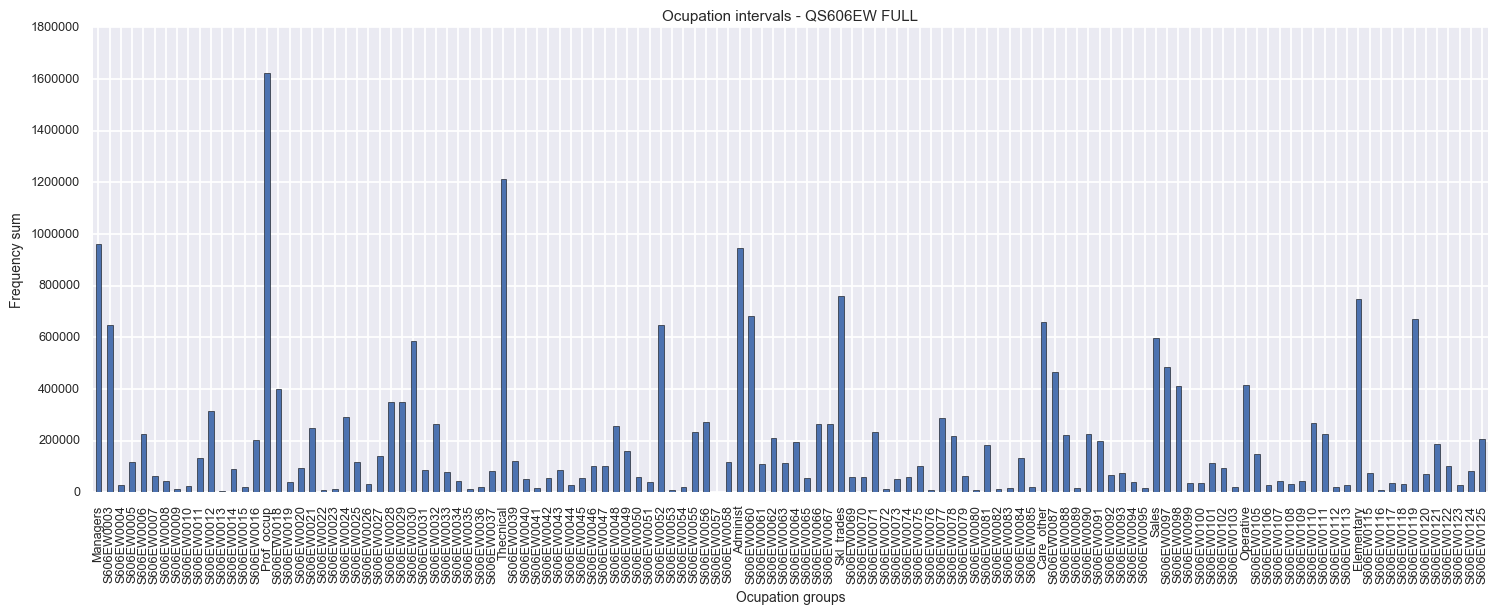

In [4]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(18, 6), dpi=300)
plt.xlabel('Ocupation groups')
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals - QS606EW FULL')
plt.ticklabel_format(style='plain', axis='y')

occup_full.sum().plot(kind='bar')

**First level hierarchy**

In [9]:
# slice ocupations columns for first hierarchy level
hier_level1 = occup_full[['Managers',
                    'Prof_occup',
                    'Thecnical',
                    'Administ',
                    'Skl_trades',
                    'Care_other',
                    'Sales',
                    'Operative',
                    'Elementary']]
hier_level1.sum()

Managers       961541
Prof_occup    1623902
Thecnical     1210759
Administ       943869
Skl_trades     759831
Care_other     660615
Sales          595677
Operative      416295
Elementary     746404
dtype: int64

In [10]:
labelsl1 = [
"Manag-direc-officials - 1",
"Professional occupations - 2",
"Assoc professional-tech occup - 3",
"Adm-secretarial occup - 4",
"Skilled trades occup - 5",
"Caring-leisure-other serv - 6",
"Sales-customer serv - 7",
"Process-plant-machine oper - 8",
"Elementary occup - 9"]

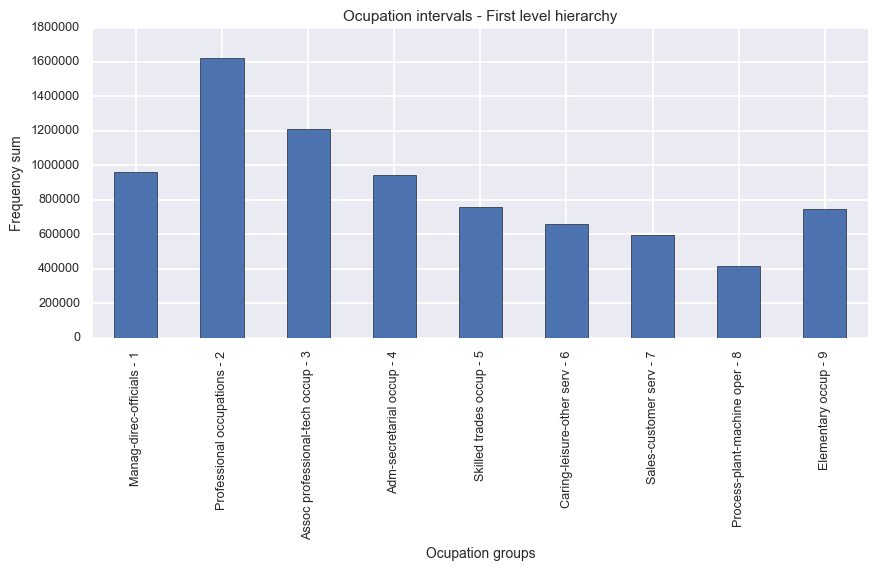

In [7]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 4), dpi=300)
plt.xlabel('Ocupation groups')
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals - First level hierarchy')
plt.ticklabel_format(style='plain', axis='y')

figl1 = hier_level1.sum().plot(kind='bar')
lab1 = figl1.set_xticklabels(labelsl1)

**Second level hierarchy**

In [8]:
# slice ocupations columns for second hierarchy level
hier_level2 = occup_full[['S606EW0003', 'S606EW0012', 'S606EW0018', 'S606EW0024', 'S606EW0028',
                          'S606EW0030', 'S606EW0039', 'S606EW0043', 'S606EW0046', 'S606EW0048',
                          'S606EW0052', 'S606EW0060', 'S606EW0066', 'S606EW0069', 'S606EW0071',
                          'S606EW0077', 'S606EW0081', 'S606EW0087', 'S606EW0091', 'S606EW0097', 
                          'S606EW0101', 'S606EW0105', 'S606EW0110', 'S606EW0115', 'S606EW0119']]
# hier_level2.sum()

In [11]:
labelsl2 = [
"Corp manag-directors - 1.2",
"Other manag-proprietors - 1.3",
"Science-research-eng-tech prof - 2.1",
"Health professionals - 2.2",
"Teaching-educational prof - 2.3",
"Business-media-public serv - 2.4",
"Science-eng-tech associate - 3.1",
"Health-social care associate - 3.2",
"Protective service occup - 3.3",
"Culture-media-sports occup - 3.4",
"Business-public serv assoc - 3.5",
"Administrative occupations - 4.1",
"Secretarial-related occup - 4.2",
# "Skilled agricult-related trades - 5.1",
"Skilled metal-electric trades - 5.2",
"Skilled const-building trades - 5.3",
"Textiles-printing-other skilled - 5.4",
"Caring personal serv occup - 6.1",
"Leisure-travel-related serv - 6.2",
"Sales occupations - 7.2",
"Customer serv occup - 7.3",
"Process-plant-machine oper - 8.1",
"Transport-machine driver-oper - 8.2",
"Element trades-related occup - 9.1",
"Element adm-service occup - 9.2"]

In [1]:
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 6), dpi=300)
plt.xlabel('Ocupation groups')
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals - Second level hierarchy')
plt.ticklabel_format(style='plain', axis='y')

fig = hier_level2.sum().plot(kind='bar')
plt.tight_layout()
lab2 = fig.set_xticklabels(labelsl2)
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Plots/Occupation_Hist_hierl2.png")

NameError: name 'sns' is not defined

**Third level hierarchy**

In [12]:
# slice ocupations columns for third hierarchy level
# removed: S606EW0013,S606EW0022,S606EW0057,S606EW0070,S606EW0116

hier_level3 = occup_full[[
'S606EW0004','S606EW0005','S606EW0006','S606EW0007','S606EW0008','S606EW0009','S606EW0010','S606EW0011',
'S606EW0014','S606EW0015','S606EW0016','S606EW0019','S606EW0020','S606EW0021',
'S606EW0023','S606EW0025','S606EW0026','S606EW0027','S606EW0029','S606EW0031','S606EW0032','S606EW0033',
'S606EW0034','S606EW0035','S606EW0036','S606EW0037','S606EW0040','S606EW0041','S606EW0042','S606EW0044',
'S606EW0045','S606EW0047','S606EW0049','S606EW0050','S606EW0051','S606EW0053','S606EW0054','S606EW0055',
'S606EW0056','S606EW0058','S606EW0061','S606EW0062','S606EW0063','S606EW0064','S606EW0065',
'S606EW0067','S606EW0072','S606EW0073','S606EW0074','S606EW0075','S606EW0076','S606EW0078',
'S606EW0079','S606EW0080','S606EW0082','S606EW0083','S606EW0084','S606EW0085','S606EW0088','S606EW0089',
'S606EW0090','S606EW0092','S606EW0093','S606EW0094','S606EW0095','S606EW0098','S606EW0099','S606EW0100',
'S606EW0102','S606EW0103','S606EW0106','S606EW0107','S606EW0108','S606EW0109','S606EW0111','S606EW0112',
'S606EW0113','S606EW0117','S606EW0118','S606EW0120','S606EW0121','S606EW0122','S606EW0123',
'S606EW0124','S606EW0125']]

# hier_level3 = occup_full[[
# 'S606EW0004','S606EW0005','S606EW0006','S606EW0007','S606EW0008','S606EW0009','S606EW0010','S606EW0011',
# 'S606EW0013','S606EW0014','S606EW0015','S606EW0016','S606EW0019','S606EW0020','S606EW0021','S606EW0022',
# 'S606EW0023','S606EW0025','S606EW0026','S606EW0027','S606EW0029','S606EW0031','S606EW0032','S606EW0033',
# 'S606EW0034','S606EW0035','S606EW0036','S606EW0037','S606EW0040','S606EW0041','S606EW0042','S606EW0044',
# 'S606EW0045','S606EW0047','S606EW0049','S606EW0050','S606EW0051','S606EW0053','S606EW0054','S606EW0055',
# 'S606EW0056','S606EW0057','S606EW0058','S606EW0061','S606EW0062','S606EW0063','S606EW0064','S606EW0065',
# 'S606EW0067','S606EW0070','S606EW0072','S606EW0073','S606EW0074','S606EW0075','S606EW0076','S606EW0078',
# 'S606EW0079','S606EW0080','S606EW0082','S606EW0083','S606EW0084','S606EW0085','S606EW0088','S606EW0089',
# 'S606EW0090','S606EW0092','S606EW0093','S606EW0094','S606EW0095','S606EW0098','S606EW0099','S606EW0100',
# 'S606EW0102','S606EW0103','S606EW0106','S606EW0107','S606EW0108','S606EW0109','S606EW0111','S606EW0112',
# 'S606EW0113','S606EW0116','S606EW0117','S606EW0118','S606EW0120','S606EW0121','S606EW0122','S606EW0123',
# 'S606EW0124','S606EW0125']]
# hier_level3.sum()

In [13]:
labelsl3 = [
"Chief Exec-Sen Offic - 1.2.1",
"Produc Manag-Directors - 1.2.2",
"Func Manag-Directors - 1.2.3",
"Finan Inst Manag-Directors - 1.2.4",
"Manag-Directors Transp-Log - 1.2.5",
"Sen Offic Protect Serv - 1.2.6",
"Health-Social Serv Manag Dir - 1.2.7",
"Manag-Dir Retail Wholesale - 1.2.8",
# "Manag-Propriet Agriculture - 1.3.1",
"Manag-Propriet Hospitality - 1.3.2",
"Manag-Propriet Health Serv - 1.3.3",
"Manag-Proprietors Other Serv - 1.3.4",
"Natural-Social Science Prof - 2.1.1",
"Engineering Prof - 2.1.2",
"Information Tech-Telecom Prof - 2.1.3",
# "Conservation-Environ Prof - 2.1.4",
"Research-Development Manag - 2.1.5",
"Health Prof - 2.2.1",
"Therapy Prof - 2.2.2",
"Nursing and Midwifery Prof - 2.2.3",
"Teaching-Educational Prof - 2.3.1",
"Legal Prof - 2.4.1",
"Business-Research-Adm Prof - 2.4.2",
"Architec-Town Plan-Surveyors - 2.4.3",
"Welfare Prof - 2.4.4",
"Librarians and  Prof - 2.4.5",
"Quality and Regulatory Prof - 2.4.6",
"Media Prof - 2.4.7",
"Science-Eng-Production Tech - 3.1.1",
"Draughtsperson-Architec Tech - 3.1.2",
"Information Technology Tech - 3.1.3",
"Health Assoc Prof - 3.2.1",
"Welfare-Housing Assoc Prof - 3.2.2",
"Protective Serv Occup - 3.3.1",
"Artistic-Literary-Media Occup - 3.4.1",
"Design Occup - 3.4.2",
"Sports and Fitness Occup - 3.4.3",
"Transport Assoc Prof - 3.5.1",
"Legal Assoc Prof - 3.5.2",
"Business-Finance-Assoc Prof - 3.5.3",
"Sales-Marketing-Assoc Prof - 3.5.4",
# "Conservat-Environ Assoc Prof - 3.5.5",
"Public Serv-Other Assoc Prof - 3.5.6",
"Adm Occup: Govern-Organis - 4.1.1",
"Adm Occup: Finance - 4.1.2",
"Adm Occup: Records - 4.1.3",
"Other Adm Occup - 4.1.4",
"Adm Occup: Offic Manag Sup - 4.1.5",
"Secretarial and  Occup - 4.2.1",
# "Agricultural and  Trades - 5.1.1",
"Metal Form-Welding Trades - 5.2.1",
"Metal Machin-Fit-Instrument - 5.2.2",
"Vehicle Trades - 5.2.3",
"Electrical-Electronic Trades - 5.2.4",
"Skilled Metal-Elec Trades Sup - 5.2.5",
"Construction-Building Trades - 5.3.1",
"Building Finishing Trades - 5.3.2",
"Constru-Building Trades Sup - 5.3.3",
"Textiles-Garments Trades - 5.4.1",
"Printing Trades - 5.4.2",
"Food Prep-Hospitality Trades - 5.4.3",
"Other Skilled Trades - 5.4.4",
"Childcare-Personal Serv - 6.1.1",
"Animal Care-Control Serv - 6.1.2",
"Caring Personal Serv - 6.1.3",
"Leisure and Travel Serv - 6.2.1",
"Hairdressers and  Serv - 6.2.2",
"Housekeeping and  Serv - 6.2.3",
"Clean-Housekeep Manag Sup - 6.2.4",
"Sales Assist-Retail Cashiers - 7.2.1",
"Sales  Occup - 7.2.2",
"Sales Supervisors - 7.2.3",
"Customer Serv Occup - 7.3.1",
"Customer Manag-Superv - 7.3.2",
"Process Oper - 8.1.1",
"Plant and Machine Oper - 8.1.2",
"Assemblers-Routine Oper - 8.1.3",
"Construction Oper - 8.1.4",
"Road Transport Drivers - 8.2.1",
"Mob Machin Drivers-Oper - 8.2.2",
"Other Driver-Transport Oper - 8.2.3",
# "Element Agricultural Occup - 9.1.1",
"Element Construct Occup - 9.1.2",
"Element Process Plant Occup - 9.1.3",
"Element Administ Occup - 9.2.1",
"Element Cleaning Occup - 9.2.2",
"Element Security Occup - 9.2.3",
"Element Sales Occup - 9.2.4",
"Element Storage Occup - 9.2.5",
"Other Element Serv Occup - 9.2.6"]

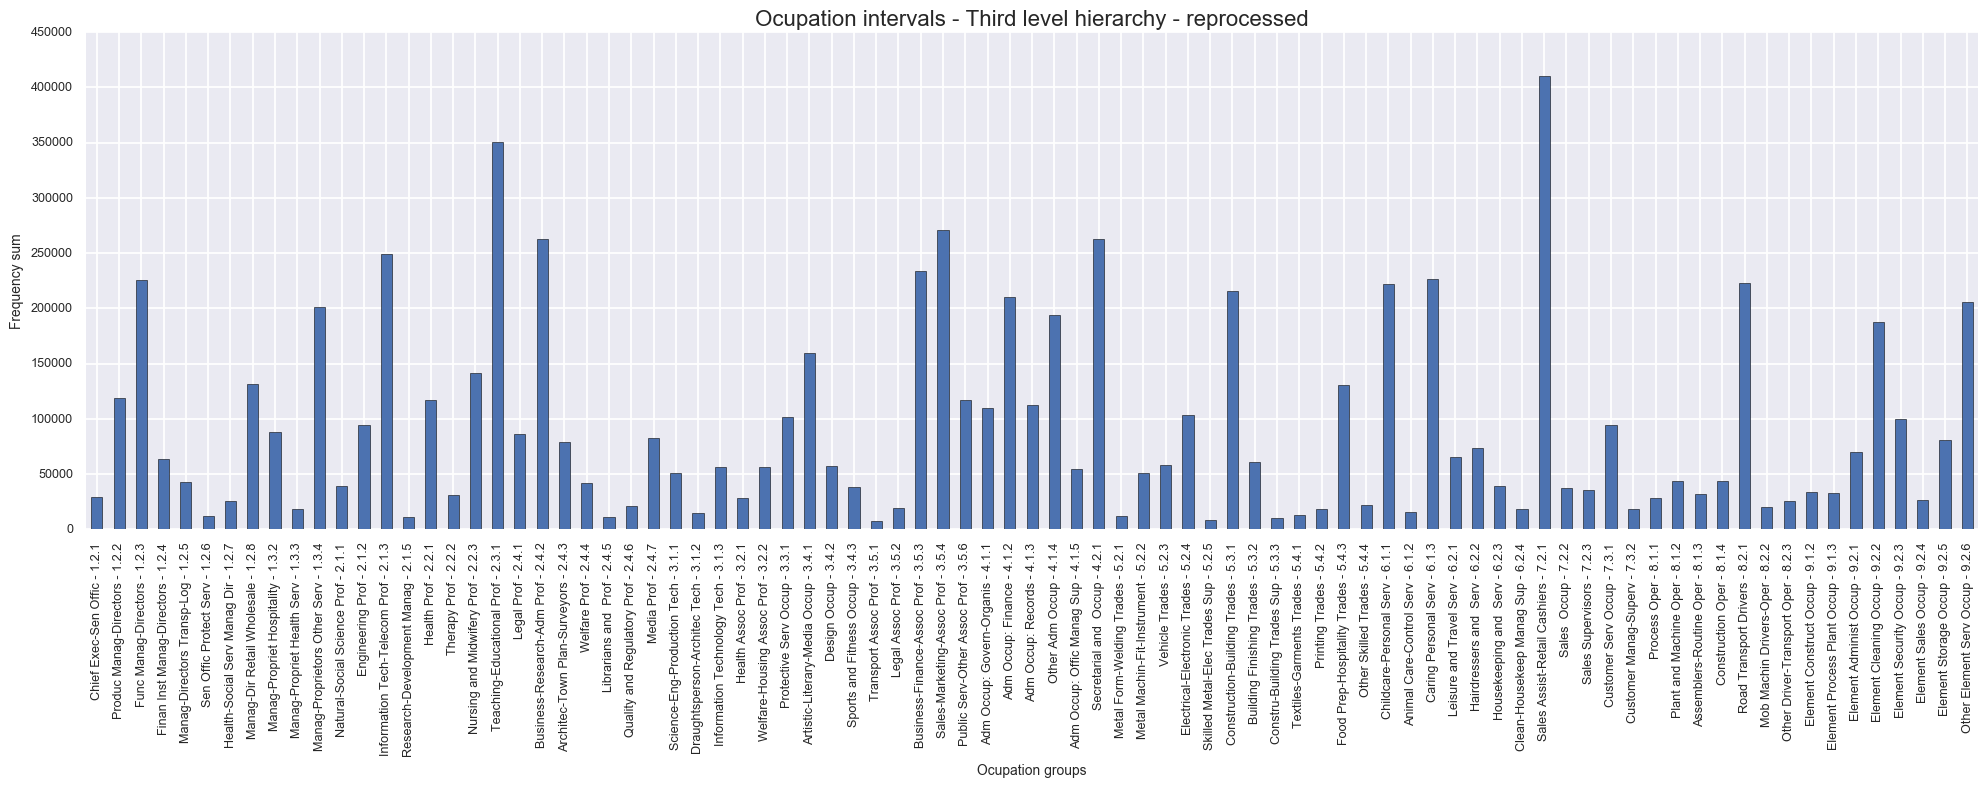

In [69]:
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(20, 8), dpi=300)
plt.xlabel('Ocupation groups')
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals - Third level hierarchy - reprocessed', fontsize=16)
plt.ticklabel_format(style='plain', axis='y')

fig = hier_level3.sum().plot(kind='bar')
lab3 = fig.set_xticklabels(labelsl3)
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Plots/Occupation_Hist_hierl3.png")

In [6]:
# Group third level hierarchies to build second and first level considering the deleted classes

dfoccup['s12'] = dfoccup[['S606EW0004','S606EW0005','S606EW0006','S606EW0007','S606EW0008','S606EW0009','S606EW0010','S606EW0011']].sum(axis=1)
dfoccup['s13'] = dfoccup[['S606EW0014','S606EW0015','S606EW0016']].sum(axis=1)
dfoccup['s21'] = dfoccup[['S606EW0019','S606EW0020','S606EW0021','S606EW0023']].sum(axis=1)
dfoccup['s22'] = dfoccup[['S606EW0025','S606EW0026','S606EW0027']].sum(axis=1)
dfoccup['s23'] = dfoccup[['S606EW0029']].sum(axis=1)
dfoccup['s24'] = dfoccup[['S606EW0031','S606EW0032','S606EW0033','S606EW0034','S606EW0035','S606EW0036','S606EW0037']].sum(axis=1)
dfoccup['s31'] = dfoccup[['S606EW0040','S606EW0041','S606EW0042']].sum(axis=1)
dfoccup['s32'] = dfoccup[['S606EW0044','S606EW0045']].sum(axis=1)
dfoccup['s33'] = dfoccup[['S606EW0047']].sum(axis=1)
dfoccup['s34'] = dfoccup[['S606EW0049','S606EW0050','S606EW0051']].sum(axis=1)
dfoccup['s35'] = dfoccup[['S606EW0053','S606EW0054','S606EW0055','S606EW0056','S606EW0058']].sum(axis=1)
dfoccup['s41'] = dfoccup[['S606EW0061','S606EW0062','S606EW0063','S606EW0064','S606EW0065']].sum(axis=1)
dfoccup['s42'] = dfoccup[['S606EW0067']].sum(axis=1)
dfoccup['s52'] = dfoccup[['S606EW0072','S606EW0073','S606EW0074','S606EW0075','S606EW0076']].sum(axis=1)
dfoccup['s53'] = dfoccup[['S606EW0078','S606EW0079','S606EW0080']].sum(axis=1)
dfoccup['s54'] = dfoccup[['S606EW0082','S606EW0083','S606EW0084','S606EW0085']].sum(axis=1)
dfoccup['s61'] = dfoccup[['S606EW0088','S606EW0089','S606EW0090']].sum(axis=1)
dfoccup['s62'] = dfoccup[['S606EW0092','S606EW0093','S606EW0094','S606EW0095']].sum(axis=1)
dfoccup['s72'] = dfoccup[['S606EW0098','S606EW0099','S606EW0100']].sum(axis=1)
dfoccup['s73'] = dfoccup[['S606EW0102','S606EW0103']].sum(axis=1)
dfoccup['s81'] = dfoccup[['S606EW0106','S606EW0107','S606EW0108','S606EW0109']].sum(axis=1)
dfoccup['s82'] = dfoccup[['S606EW0111','S606EW0112','S606EW0113']].sum(axis=1)
dfoccup['s91'] = dfoccup[['S606EW0117','S606EW0118']].sum(axis=1)
dfoccup['s92'] = dfoccup[['S606EW0120','S606EW0121','S606EW0122','S606EW0123','S606EW0124','S606EW0125']].sum(axis=1)

# First level 
dfoccup['s1'] = dfoccup[['s12','s13']].sum(axis=1)
dfoccup['s2'] = dfoccup[['s21','s22','s23','s24']].sum(axis=1)
dfoccup['s3'] = dfoccup[['s31','s32','s33','s34','s35']].sum(axis=1)
dfoccup['s4'] = dfoccup[['s41','s42']].sum(axis=1)
dfoccup['s5'] = dfoccup[['s52','s53','s54']].sum(axis=1)
dfoccup['s6'] = dfoccup[['s61','s62']].sum(axis=1)
dfoccup['s7'] = dfoccup[['s72','s73']].sum(axis=1)
dfoccup['s8'] = dfoccup[['s81','s82']].sum(axis=1)
dfoccup['s9'] = dfoccup[['s91','s92']].sum(axis=1)

In [8]:
# Save data with new columns to csv
csv_temp = "~/Downloads/occupation_grouped_qs606oa.csv"
dfoccup.loc[:,'Geocode':'s9'].to_csv(csv_temp)  #save to csv

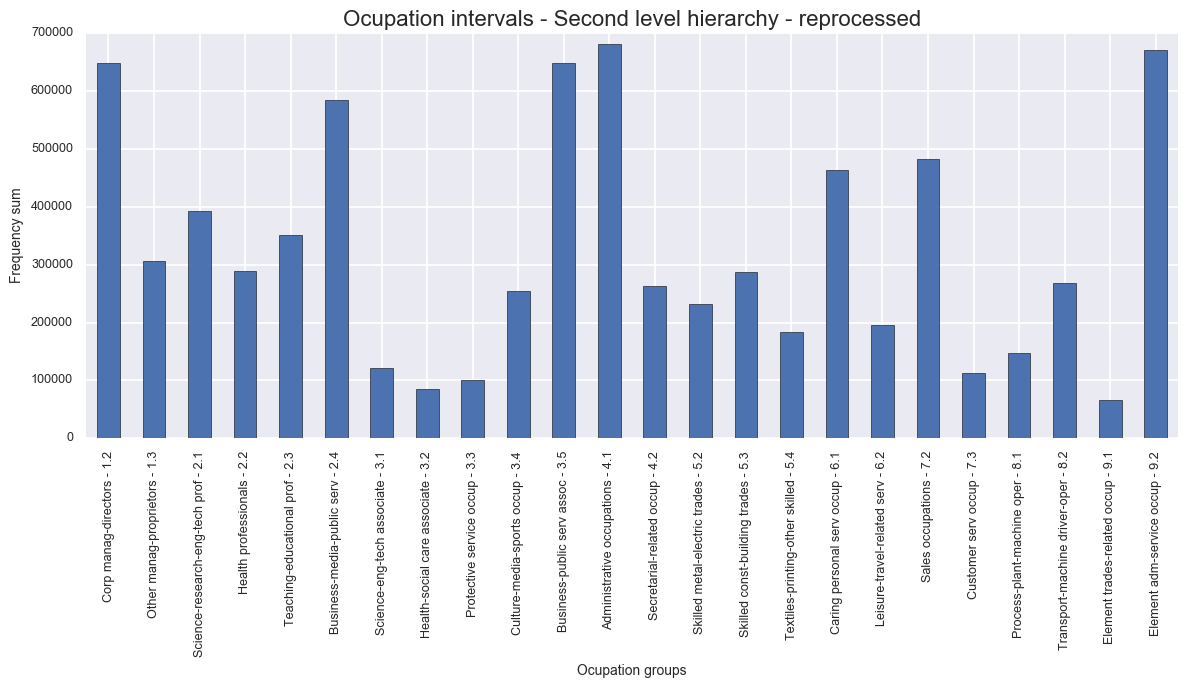

In [52]:
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 7), dpi=300)
plt.xlabel('Ocupation groups')
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals - Second level hierarchy - reprocessed', fontsize=16)
plt.ticklabel_format(style='plain', axis='y')

figr = dfoccup.loc[:,'s12':'s92'].sum().plot(kind='bar')
lab3r = figr.set_xticklabels(labelsl2)
plt.tight_layout()

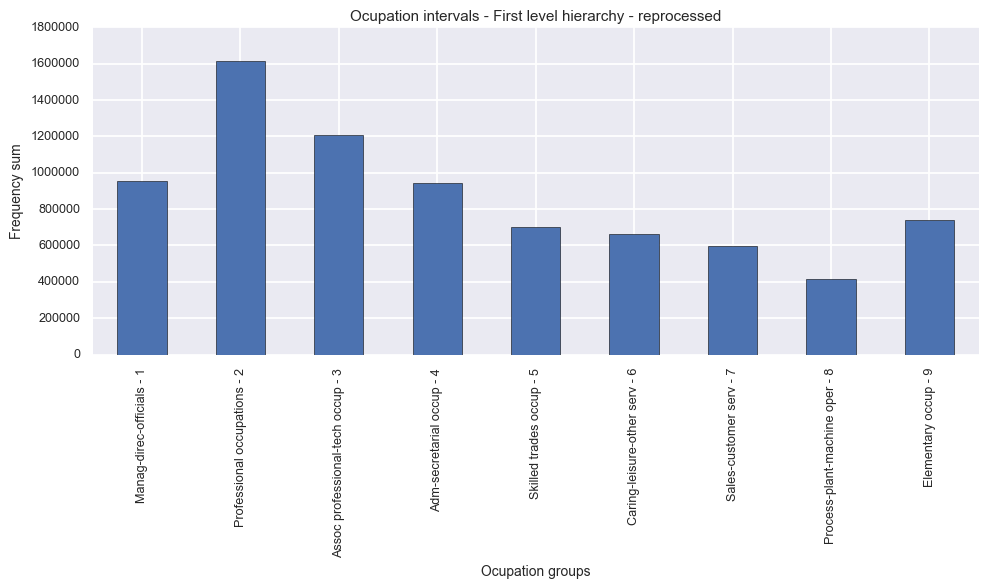

In [62]:
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 6), dpi=300)
plt.xlabel('Ocupation groups')
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals - First level hierarchy - reprocessed')
plt.ticklabel_format(style='plain', axis='y')

figr = dfoccup.loc[:,'s1':'s9'].sum().plot(kind='bar')
lab3r = figr.set_xticklabels(labelsl1)
plt.tight_layout()

### Pearson Correlation - QS606EW Full

This data frame selects columns data with percentage for ocupation groups

In [14]:
# Slice data frame to get proportion data columns
occup_prop = dfoccup.loc[:,'Managers':'S606EW0125'] 
cor_occup_prop = occup_prop.corr()
cor_occup_prop.head()

Managers  S606EW0003  S606EW0004  S606EW0005  S606EW0006  \
Managers    1.000000    0.952843    0.514982    0.522413    0.772745   
S606EW0003  0.952843    1.000000    0.510442    0.526658    0.775574   
S606EW0004  0.514982    0.510442    1.000000    0.154121    0.490156   
S606EW0005  0.522413    0.526658    0.154121    1.000000    0.302285   
S606EW0006  0.772745    0.775574    0.490156    0.302285    1.000000   

            S606EW0007  S606EW0008  S606EW0009  S606EW0010  S606EW0011  \
Managers      0.518547    0.172233    0.341881    0.183304    0.420265   
S606EW0003    0.543690    0.192378    0.431467    0.182987    0.420394   
S606EW0004    0.415060   -0.039073    0.004651    0.025633    0.080921   
S606EW0005    0.150807    0.162197    0.008589    0.081228    0.234470   
S606EW0006    0.472136    0.016955    0.010829    0.098288    0.179555   

               ...      S606EW0116  S606EW0117  S606EW0118  S606EW0119  \
Managers       ...        0.082271   -0.141364   -0.161173   -0.320810   
S606EW0003     ...        0.053896   -0.144633   -0.160259   -0.335156   
S606EW0004     ...        0.016541   -0.135318   -0.136759   -0.262155   
S606EW0005     ...        0.141239   -0.033215   -0.069034   -0.218193   
S606EW0006     ...        0.011001   -0.194834   -0.214747   -0.391935   

            S606EW0120  S606EW0121  S606EW0122  S606EW0123  S606EW0124  \
Managers     -0.166177   -0.292735   -0.245297   -0.137706   -0.227219   
S606EW0003   -0.163557   -0.304181   -0.247223   -0.128542   -0.213341   
S606EW0004   -0.175634   -0.204873   -0.194522   -0.132156   -0.193757   
S606EW0005   -0.061150   -0.206958   -0.169928   -0.036963   -0.087627   
S606EW0006   -0.223025   -0.337352   -0.285569   -0.180025   -0.289044   

            S606EW0125  
Managers     -0.115543  
S606EW0003   -0.148927  
S606EW0004   -0.106480  
S606EW0005   -0.141436  
S606EW0006   -0.151870  

[5 rows x 124 columns]

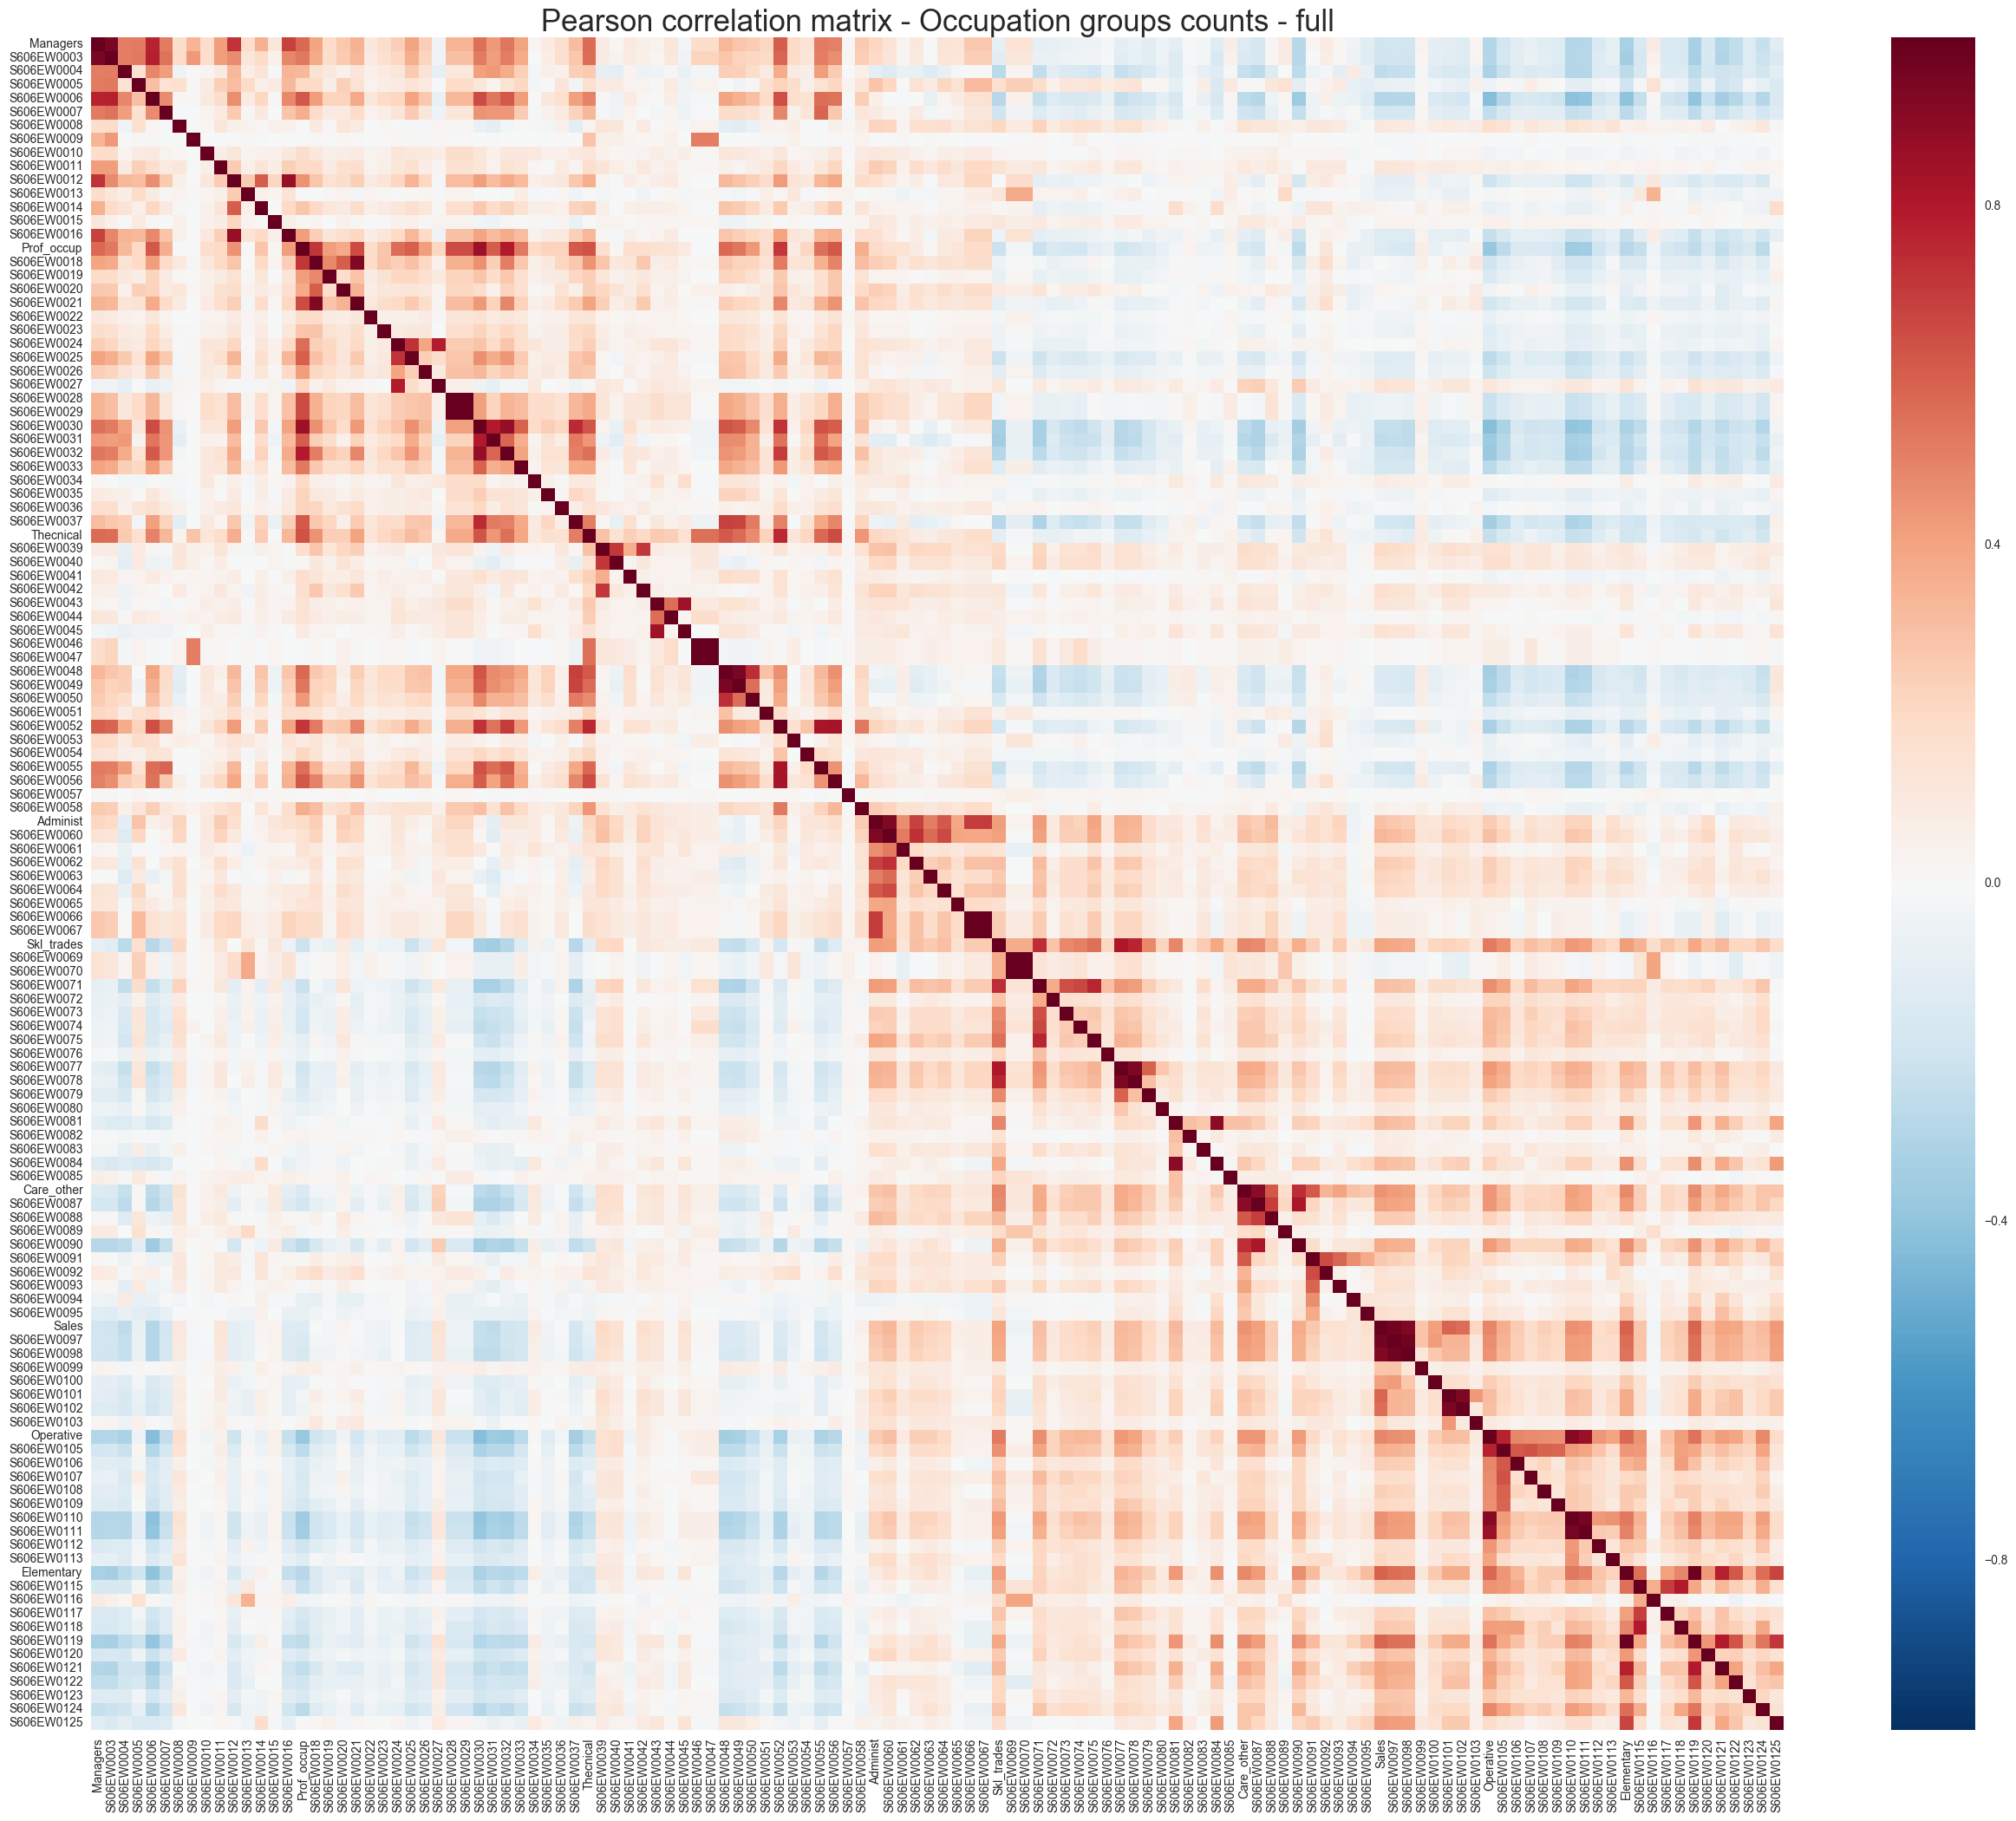

In [15]:
# Plot Heatmap based on cor_ocup_prop data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
f4, ax4 = plt.subplots(figsize=(26, 21), dpi=300)
plt.title('Pearson correlation matrix - Occupation groups counts - full', fontsize=25)
sns.heatmap(cor_occup_prop, square=True)
f4.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_full.png")

**First level Hierarchy**

In [16]:
cor_occup_hier1 = hier_level1.corr()
cor_occup_hier1.head()

Managers  Prof_occup  Thecnical  Administ  Skl_trades  Care_other  \
Managers    1.000000    0.571460   0.564877  0.211067   -0.088717   -0.133266   
Prof_occup  0.571460    1.000000   0.634032  0.194281   -0.216498   -0.140812   
Thecnical   0.564877    0.634032   1.000000  0.205755   -0.094837   -0.071042   
Administ    0.211067    0.194281   0.205755  1.000000    0.417765    0.279350   
Skl_trades -0.088717   -0.216498  -0.094837  0.417765    1.000000    0.485597   

               Sales  Operative  Elementary  
Managers   -0.189232  -0.294065   -0.321610  
Prof_occup -0.140456  -0.377297   -0.275421  
Thecnical  -0.080102  -0.238804   -0.192019  
Administ    0.289515   0.253101    0.087928  
Skl_trades  0.402806   0.520685    0.420249

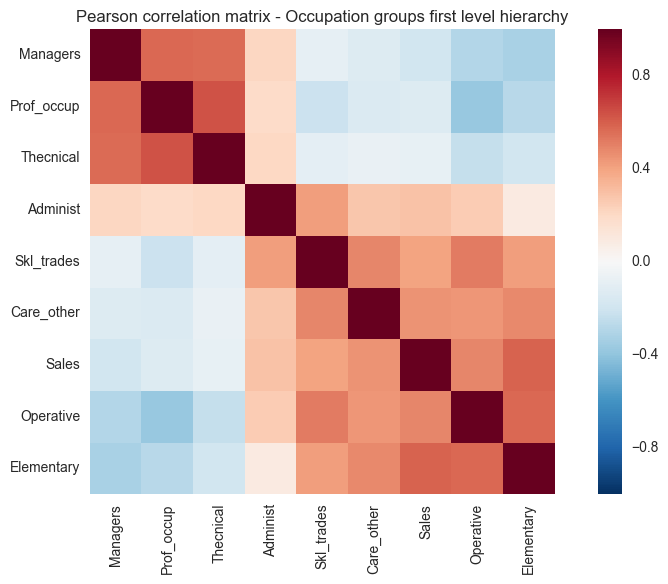

In [17]:
# Plot Heatmap based on hier_level3 data frame 
% matplotlib inline
sns.set(context="notebook")
f6, ax6 = plt.subplots(figsize=(9, 6), dpi=300)
plt.title('Pearson correlation matrix - Occupation groups first level hierarchy')
sns.heatmap(cor_occup_hier1, square=True)
f6.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_.png")

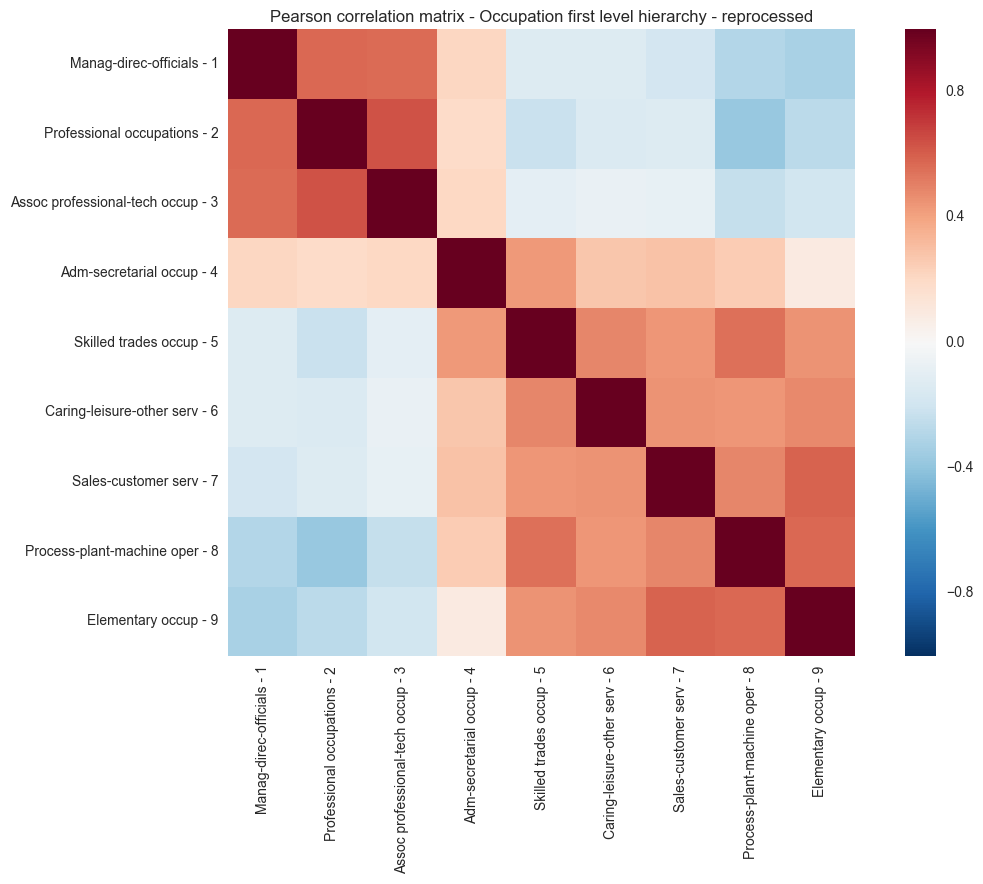

In [74]:
# Plot Heatmap based on hier_level3 data frame 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(12, 9), dpi=300)
plt.title('Pearson correlation matrix - Occupation first level hierarchy - reprocessed')
sns.heatmap(dfoccup.loc[:,'s1':'s9'].corr(), square=True, xticklabels=labelsl1, yticklabels=labelsl1)
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_.png")

**Second level Hierarchy**

In [18]:
cor_occup_hier2 = hier_level2.corr()
cor_occup_hier2.head()

S606EW0003  S606EW0012  S606EW0018  S606EW0024  S606EW0028  \
S606EW0003    1.000000    0.476020    0.381279    0.214975    0.298242   
S606EW0012    0.476020    1.000000    0.278210    0.212394    0.309344   
S606EW0018    0.381279    0.278210    1.000000    0.235230    0.359151   
S606EW0024    0.214975    0.212394    0.235230    1.000000    0.252285   
S606EW0028    0.298242    0.309344    0.359151    0.252285    1.000000   

            S606EW0030  S606EW0039  S606EW0043  S606EW0046  S606EW0048  \
S606EW0003    0.518069    0.083696    0.020159    0.222772    0.276921   
S606EW0012    0.416920    0.037519    0.064483   -0.005915    0.322417   
S606EW0018    0.460702    0.273865    0.069076    0.023249    0.272508   
S606EW0024    0.283690    0.083672    0.121057    0.015770    0.188351   
S606EW0028    0.409303    0.130276    0.175745    0.007326    0.390024   

               ...      S606EW0077  S606EW0081  S606EW0087  S606EW0091  \
S606EW0003     ...       -0.114593   -0.133320   -0.178367   -0.007255   
S606EW0012     ...       -0.029195    0.032767   -0.102586    0.076501   
S606EW0018     ...       -0.084565   -0.013614   -0.088396    0.073900   
S606EW0024     ...       -0.043053    0.009832    0.050921    0.034796   
S606EW0028     ...       -0.029585    0.015133   -0.026553    0.017533   

            S606EW0097  S606EW0101  S606EW0105  S606EW0110  S606EW0115  \
S606EW0003   -0.191166   -0.114980   -0.173649   -0.285527   -0.165996   
S606EW0012   -0.094659   -0.046313   -0.134406   -0.202062   -0.073718   
S606EW0018   -0.027651    0.069382   -0.117530   -0.199891   -0.144618   
S606EW0024   -0.004190    0.032103   -0.085696   -0.101968   -0.073873   
S606EW0028   -0.061584   -0.009484   -0.145568   -0.223064   -0.141284   

            S606EW0119  
S606EW0003   -0.335156  
S606EW0012   -0.163770  
S606EW0018   -0.134452  
S606EW0024   -0.048328  
S606EW0028   -0.161730  

[5 rows x 25 columns]

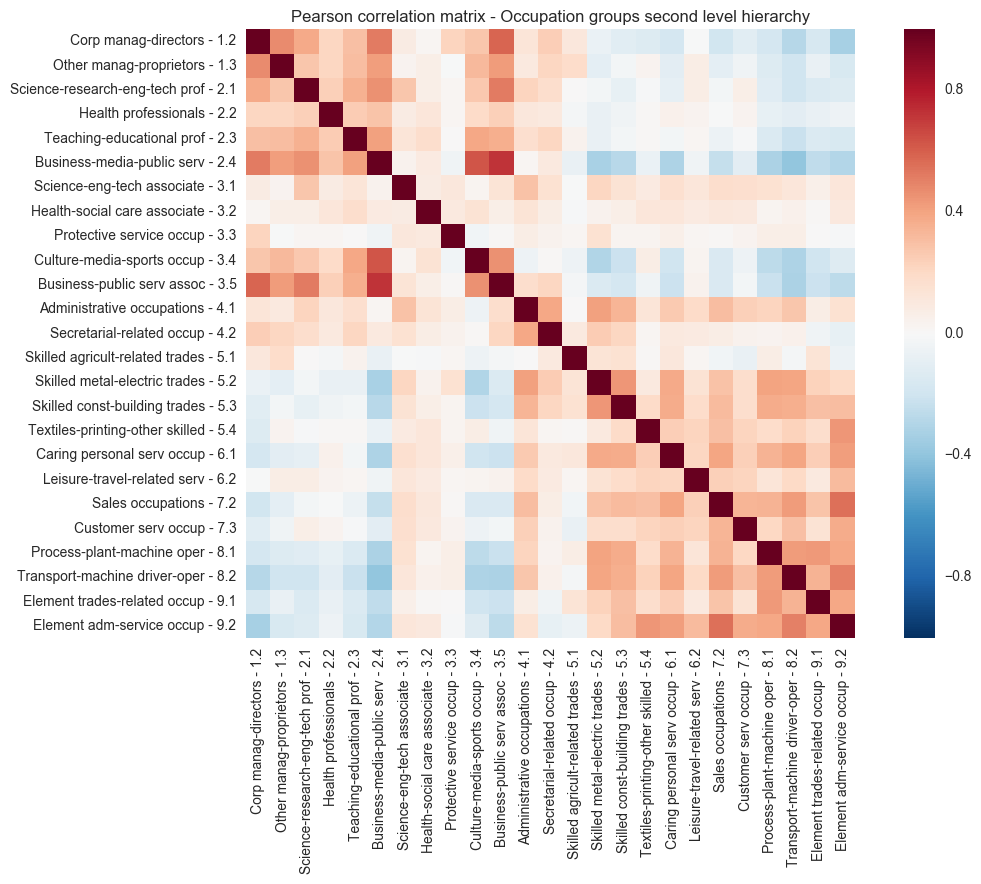

In [19]:
# Plot Heatmap based on hier_level3 data frame 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(12, 9), dpi=300)
plt.title('Pearson correlation matrix - Occupation groups second level hierarchy')
f7 = sns.heatmap(cor_occup_hier2, square=True)
f7.set_xticklabels(labelsl2)
f7.set_yticklabels(reversed(labelsl2))
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_hierl2.png")

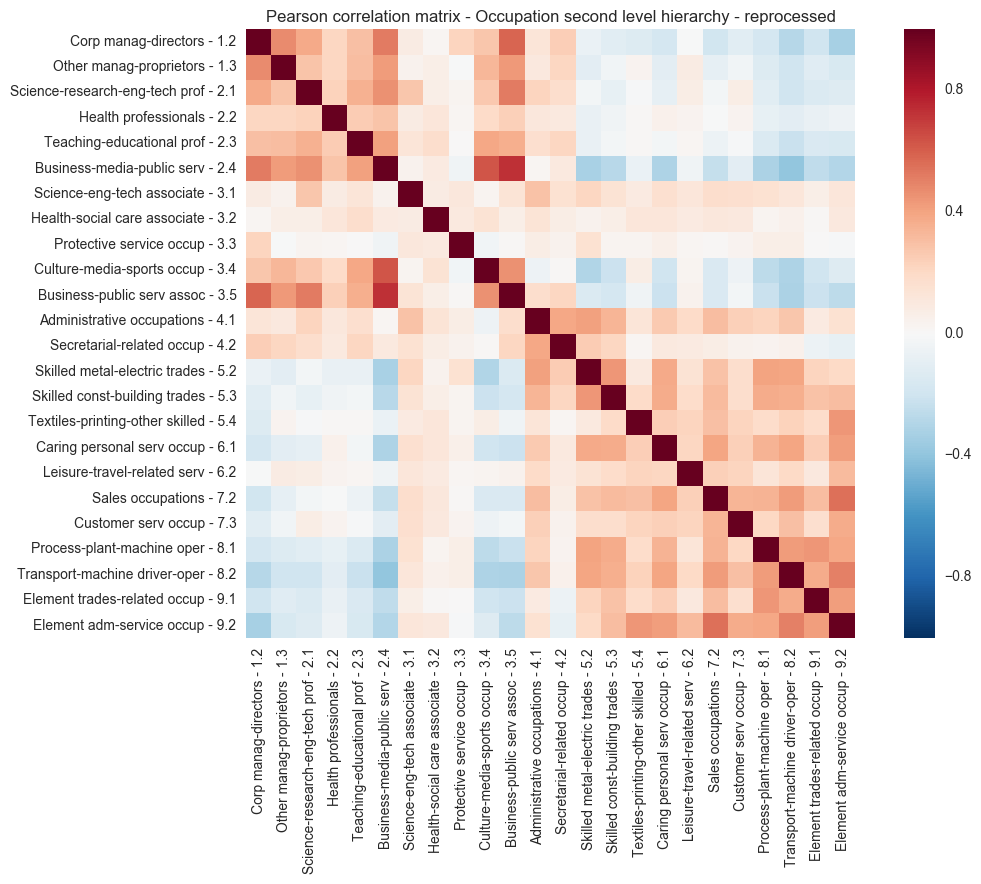

In [72]:
# Plot Heatmap based on hier_level3 data frame 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(12, 9), dpi=300)
plt.title('Pearson correlation matrix - Occupation second level hierarchy - reprocessed')
sns.heatmap(dfoccup.loc[:,'s12':'s92'].corr(), square=True, xticklabels=labelsl2, yticklabels=labelsl2)
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_.png")

**Third level Hierarchy**

In [24]:
cor_occup_hier3 = hier_level3.corr()
cor_occup_hier3.head()

S606EW0004  S606EW0005  S606EW0006  S606EW0007  S606EW0008  \
S606EW0004    1.000000    0.154121    0.490156    0.415060   -0.039073   
S606EW0005    0.154121    1.000000    0.302285    0.150807    0.162197   
S606EW0006    0.490156    0.302285    1.000000    0.472136    0.016955   
S606EW0007    0.415060    0.150807    0.472136    1.000000   -0.010566   
S606EW0008   -0.039073    0.162197    0.016955   -0.010566    1.000000   

            S606EW0009  S606EW0010  S606EW0011  S606EW0014  S606EW0015  \
S606EW0004    0.004651    0.025633    0.080921    0.135467   -0.014741   
S606EW0005    0.008589    0.081228    0.234470    0.058464    0.087774   
S606EW0006    0.010829    0.098288    0.179555    0.204100    0.011856   
S606EW0007   -0.000662    0.034135    0.087434    0.100128   -0.003995   
S606EW0008    0.005381    0.020876    0.122237    0.012815    0.047576   

               ...      S606EW0112  S606EW0113  S606EW0117  S606EW0118  \
S606EW0004     ...       -0.135571   -0.125826   -0.135318   -0.136759   
S606EW0005     ...       -0.032215   -0.018475   -0.033215   -0.069034   
S606EW0006     ...       -0.199761   -0.150008   -0.194834   -0.214747   
S606EW0007     ...       -0.118371   -0.091261   -0.124637   -0.132385   
S606EW0008     ...        0.078476    0.135394    0.033787    0.049661   

            S606EW0120  S606EW0121  S606EW0122  S606EW0123  S606EW0124  \
S606EW0004   -0.175634   -0.204873   -0.194522   -0.132156   -0.193757   
S606EW0005   -0.061150   -0.206958   -0.169928   -0.036963   -0.087627   
S606EW0006   -0.223025   -0.337352   -0.285569   -0.180025   -0.289044   
S606EW0007   -0.132766   -0.226142   -0.170304   -0.107273   -0.183975   
S606EW0008    0.082676   -0.002926    0.033397    0.060543    0.109369   

            S606EW0125  
S606EW0004   -0.106480  
S606EW0005   -0.141436  
S606EW0006   -0.151870  
S606EW0007   -0.131448  
S606EW0008   -0.018939  

[5 rows x 85 columns]

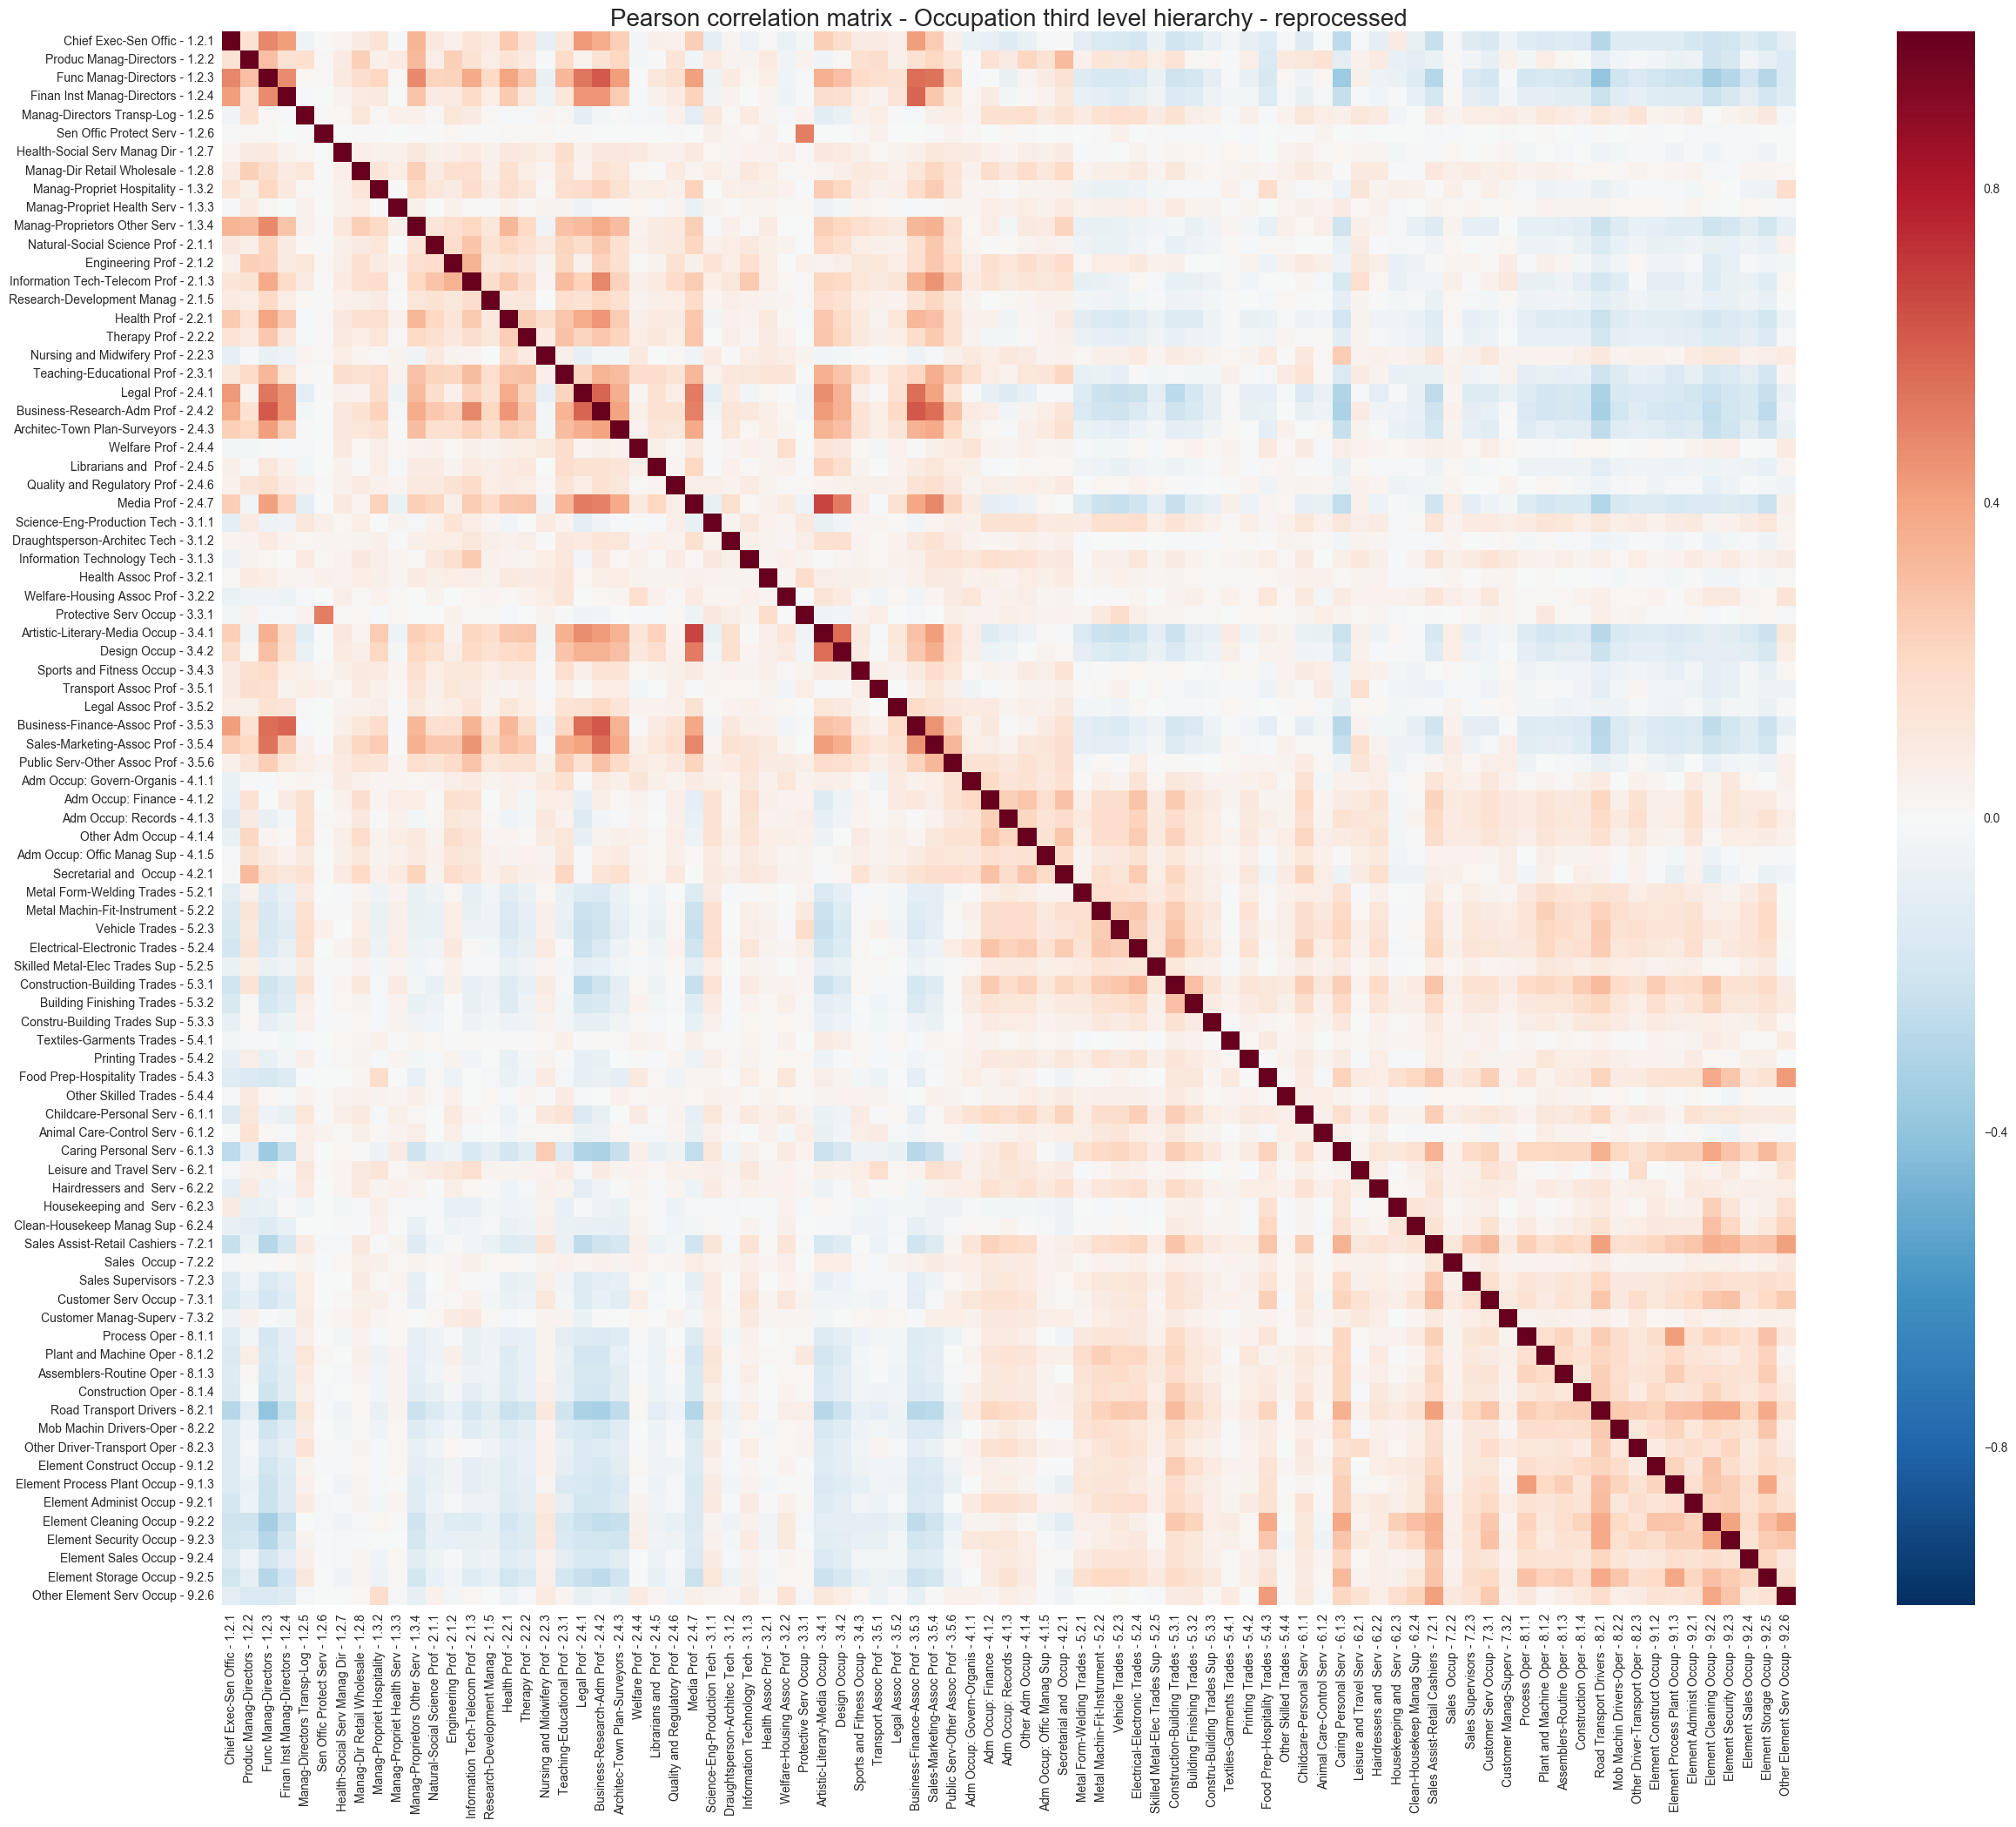

In [75]:
# Plot Heatmap based on hier_level3 data frame 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(26, 21), dpi=300)
plt.title('Pearson correlation matrix - Occupation third level hierarchy - reprocessed', fontsize=20)
f8 = sns.heatmap(cor_occup_hier3, square=True, xticklabels=labelsl3, yticklabels=labelsl3)
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_hierl3.png")

### Moran I Correlation QS606EW Full

#### Based on Queen Contiguity Weight

Prepares data reading shape file for OA London and computes Contiguity Based Weights using Queen method

In [23]:
# Save data with new columns to csv
csvoccup = "~/Dropbox/Resolution - SP London/Data/Census/London/Census data for Segregation/"\
            "qs606ew_2011_occupation/qs606ew_reprocessed.csv"
dfoccup.loc[:,['Geocode','s12','s13','s21','s22','s23','s24','s31','s32','s33','s34','s35','s41','s42','s52','s53','s54',
         's61','s62','s72','s73','s81','s82','s91','s92','s1','s2','s3','s4','s5','s6','s7','s8','s9']].to_csv(csvoccup, index=False)

In [25]:
shp_path3 = "/Users/sandrofsousa/Downloads/reprocessing/resolution_oa_2011_qs606ew.shp"
weight_cont_occup = pysal.queen_from_shapefile(shp_path3)

('Island id: ', [34622])


**Histogram showing the distribuition of neighbors in queen weight**

<Container object of 29 artists>

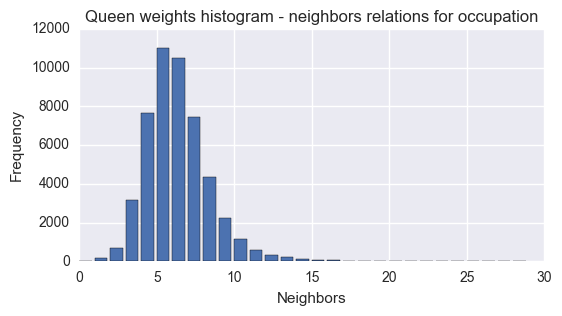

In [27]:
% matplotlib inline
sns.set(context="notebook")
plt.figure(facecolor="white", figsize=(6, 3), dpi=300)
plt.xlabel('Neighbors')
plt.ylabel('Frequency')
plt.title('Queen weights histogram - neighbors relations for occupation')
plt.bar(*zip(*weight_cont_occup.histogram))

**Compute Bivariate Moran for all elements of occupation groups**

Variables are compared pairwised resulting on a matrix
999 random permutations are used for calculation of pseudo p_values

In [27]:
# Call main function to compute Moran and P-values ethnic groups
    
f2 = pysal.open("/Users/sandrofsousa/Downloads/reprocessing/resolution_oa_2011_qs606ew_cent.dbf")

In [ ]:
var_occup = list(cor_occup_prop)
matrices_occup = calc_moran_matrix(var_occup, weight_cont_occup, f2)

DataFrame with pairwise results

In [ ]:
dfmoran_occup = pd.DataFrame(matrices_occup[0], columns=var_occup, index=var_occup)
dfmoran_occup.head()

In [ ]:
# Plot Heatmap based on dfmoran_occup data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
f5, ax5 = plt.subplots(figsize=(26, 21), dpi=300)
plt.title('Moran I correlation matrix - Ocupation groups Queen weight', fontsize=25)
sns.heatmap(dfmoran_occup, square=True)
f5.tight_layout()
plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_moran_full.png")

**Moran Bivariate Queen weight for first hierarchy level**

In [81]:
var_occup_hier1 = list(hier_level1)
matrices_occupl1 = calc_moran_matrix(var_occup_hier1, weight_cont_occup, f2)

In [83]:
dfmoran_occup_hier1 = pd.DataFrame(matrices_occupl1[0], columns=var_occup_hier1, index=var_occup_hier1)
dfmoran_occup_hier1.head()

Managers  Prof_occup  Thecnical  Administ  Skl_trades  Care_other  \
Managers    0.431649    0.302791   0.251287 -0.007586   -0.167252   -0.203695   
Prof_occup  0.300707    0.514474   0.353787 -0.036383   -0.292201   -0.222432   
Thecnical   0.256415    0.356299   0.355158 -0.015663   -0.208066   -0.162634   
Administ   -0.008763   -0.041071  -0.024708  0.340915    0.214861    0.096408   
Skl_trades -0.166023   -0.295504  -0.215997  0.212293    0.465077    0.257668   

               Sales  Operative  Elementary  
Managers   -0.254544  -0.305539   -0.324846  
Prof_occup -0.206905  -0.377197   -0.271916  
Thecnical  -0.171863  -0.281888   -0.215532  
Administ    0.105794   0.143235   -0.008697  
Skl_trades  0.220566   0.361202    0.227773

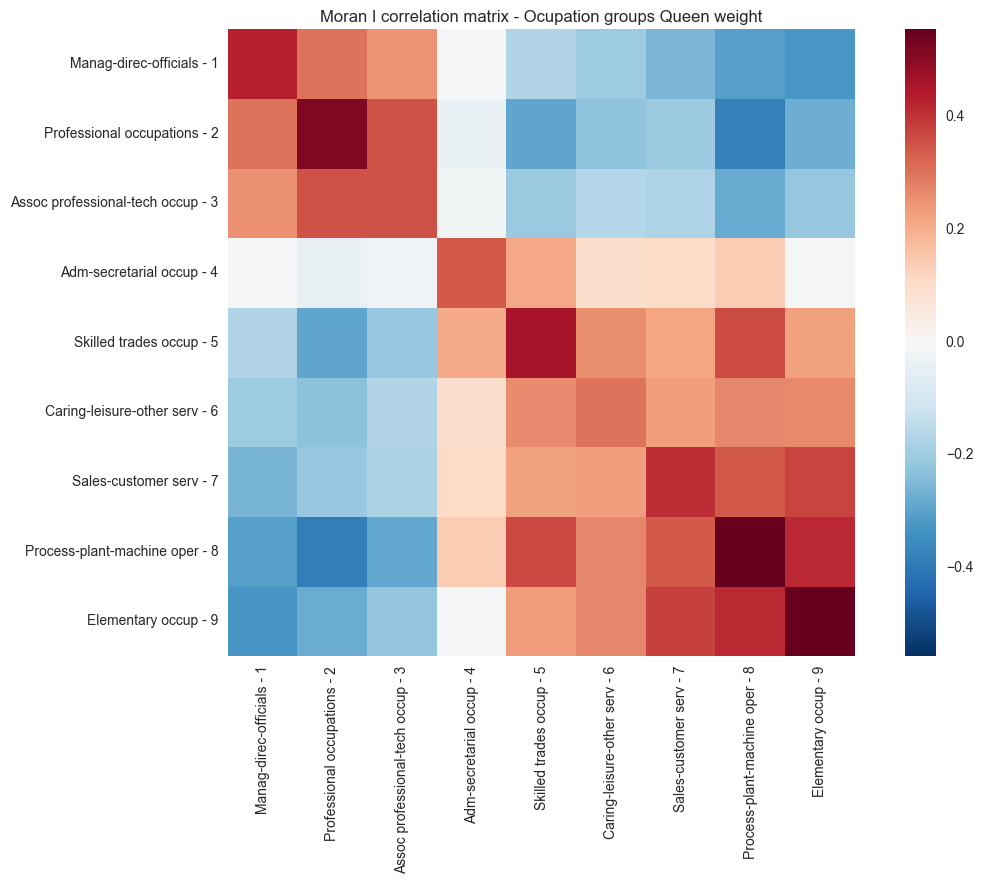

In [94]:
# Plot Heatmap based on dfmoran_occup data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(12,9), dpi=300)
plt.title('Moran I correlation matrix - Ocupation groups Queen weight Hierarchy level 1')
h1 = sns.heatmap(dfmoran_occup_hier1, square=True)
h1.set_xticklabels(labelsl1, rotation='vertical')
h1.set_yticklabels(reversed(labelsl1), rotation='horizontal')
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_moran_hierl1.png")

In [28]:
var_occup_repl1 = list(dfoccup.loc[:,'s1':'s9'])
matrices_occuprep1 = calc_moran_matrix(var_occup_repl1, weight_cont_occup, f2)

('WARNING: ', 34622, ' is an island (no neighbors)')


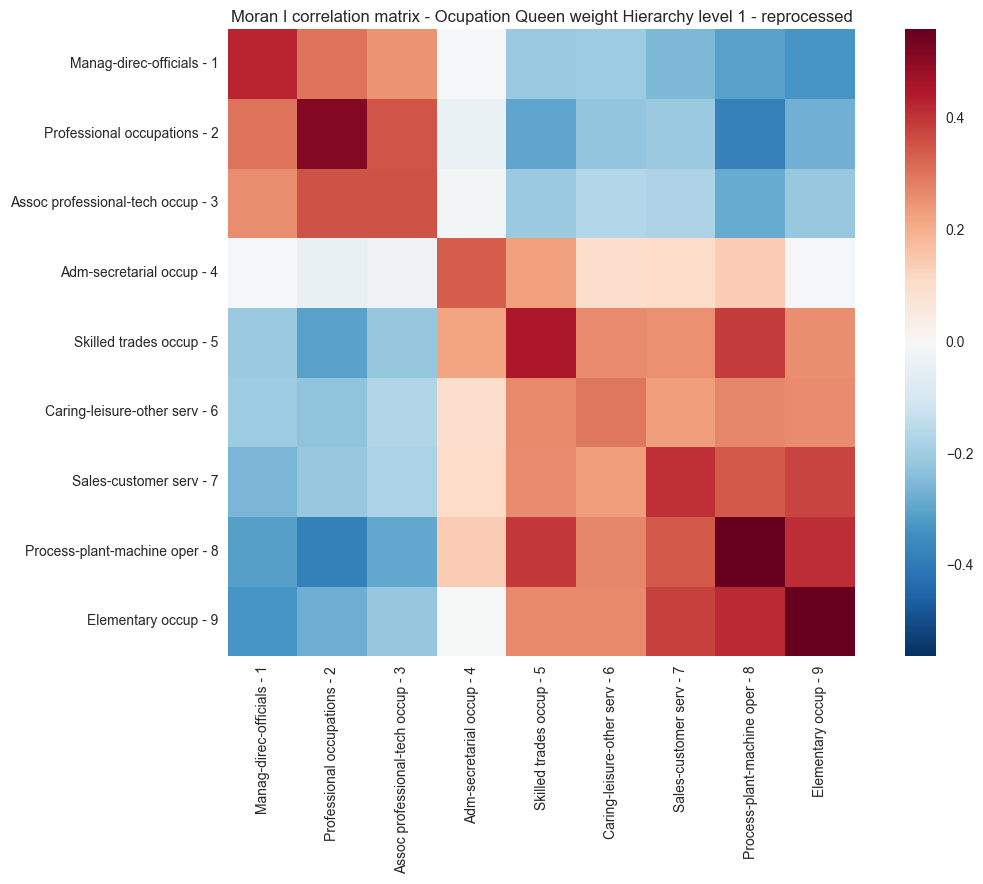

In [30]:
dfmoran_occup_rep1 = pd.DataFrame(matrices_occuprep1[0], columns=var_occup_repl1, index=var_occup_repl1)

# Plot Heatmap based on dfmoran_occup data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(12,9), dpi=300)
plt.title('Moran I correlation matrix - Ocupation Queen weight Hierarchy level 1 - reprocessed')
h1 = sns.heatmap(dfmoran_occup_rep1, square=True, xticklabels=labelsl1, yticklabels=labelsl1)
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_moran_hierl1.png")

**Moran Bivariate Queen weight for second hierarchy level**

In [95]:
var_occup_hier2 = list(hier_level2)
matrices_occupl2 = calc_moran_matrix(var_occup_hier2, weight_cont_occup, f2)

In [96]:
dfmoran_occup_hier2 = pd.DataFrame(matrices_occupl2[0], columns=var_occup_hier2, index=var_occup_hier2)
dfmoran_occup_hier2.head()

S606EW0003  S606EW0012  S606EW0018  S606EW0024  S606EW0028  \
S606EW0003    0.405955    0.270756    0.198136    0.084665    0.140188   
S606EW0012    0.264298    0.282213    0.123746    0.092683    0.159390   
S606EW0018    0.202225    0.126824    0.445151    0.099435    0.187096   
S606EW0024    0.080494    0.089649    0.097559    0.231911    0.119665   
S606EW0028    0.138996    0.161471    0.184985    0.119285    0.362624   

            S606EW0030  S606EW0039  S606EW0043  S606EW0046  S606EW0048  \
S606EW0003    0.303891   -0.021099   -0.053247    0.021082    0.145289   
S606EW0012    0.239391   -0.041581   -0.005780   -0.015689    0.185842   
S606EW0018    0.252586    0.131005    0.000295   -0.002621    0.135226   
S606EW0024    0.157930    0.001447    0.038010   -0.010169    0.106912   
S606EW0028    0.236732    0.018809    0.078004   -0.012331    0.247994   

               ...      S606EW0077  S606EW0081  S606EW0087  S606EW0091  \
S606EW0003     ...       -0.151440   -0.164598   -0.211159   -0.064882   
S606EW0012     ...       -0.097167   -0.058594   -0.158234   -0.015205   
S606EW0018     ...       -0.125616   -0.058220   -0.128674   -0.002682   
S606EW0024     ...       -0.075575   -0.027418   -0.044033   -0.021496   
S606EW0028     ...       -0.083554   -0.036597   -0.096610   -0.051046   

            S606EW0097  S606EW0101  S606EW0105  S606EW0110  S606EW0115  \
S606EW0003   -0.233513   -0.165150   -0.189624   -0.281618   -0.159540   
S606EW0012   -0.159885   -0.102984   -0.166536   -0.212866   -0.097162   
S606EW0018   -0.079047   -0.003009   -0.143734   -0.191592   -0.139827   
S606EW0024   -0.052531   -0.021247   -0.109298   -0.108565   -0.081155   
S606EW0028   -0.121584   -0.068644   -0.175278   -0.224150   -0.136367   

            S606EW0119  
S606EW0003   -0.324129  
S606EW0012   -0.197389  
S606EW0018   -0.137339  
S606EW0024   -0.071607  
S606EW0028   -0.178214  

[5 rows x 25 columns]

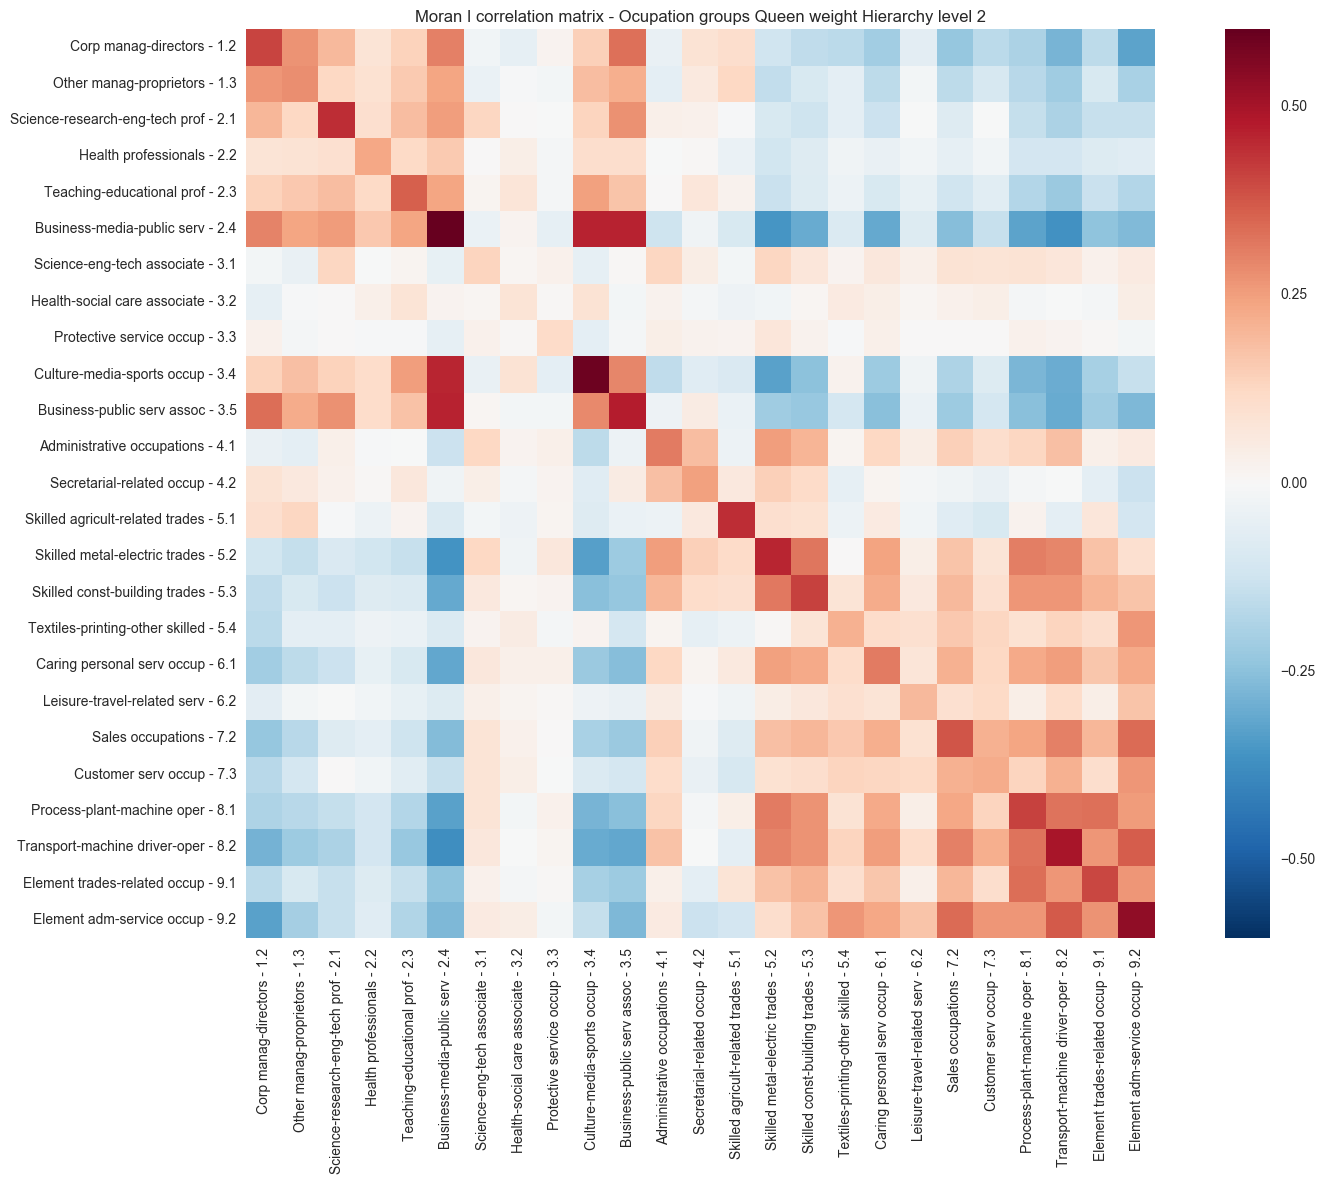

In [98]:
# Plot Heatmap based on dfmoran_occup data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(16,12), dpi=300)
plt.title('Moran I correlation matrix - Ocupation groups Queen weight Hierarchy level 2')
h2 = sns.heatmap(dfmoran_occup_hier2, square=True)
h2.set_xticklabels(labelsl2)
h2.set_yticklabels(reversed(labelsl2))
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_moran_hierl2.png")

In [31]:
var_occup_repl2 = list(dfoccup.loc[:,'s12':'s92'])
matrices_occuprep2 = calc_moran_matrix(var_occup_repl2, weight_cont_occup, f2)

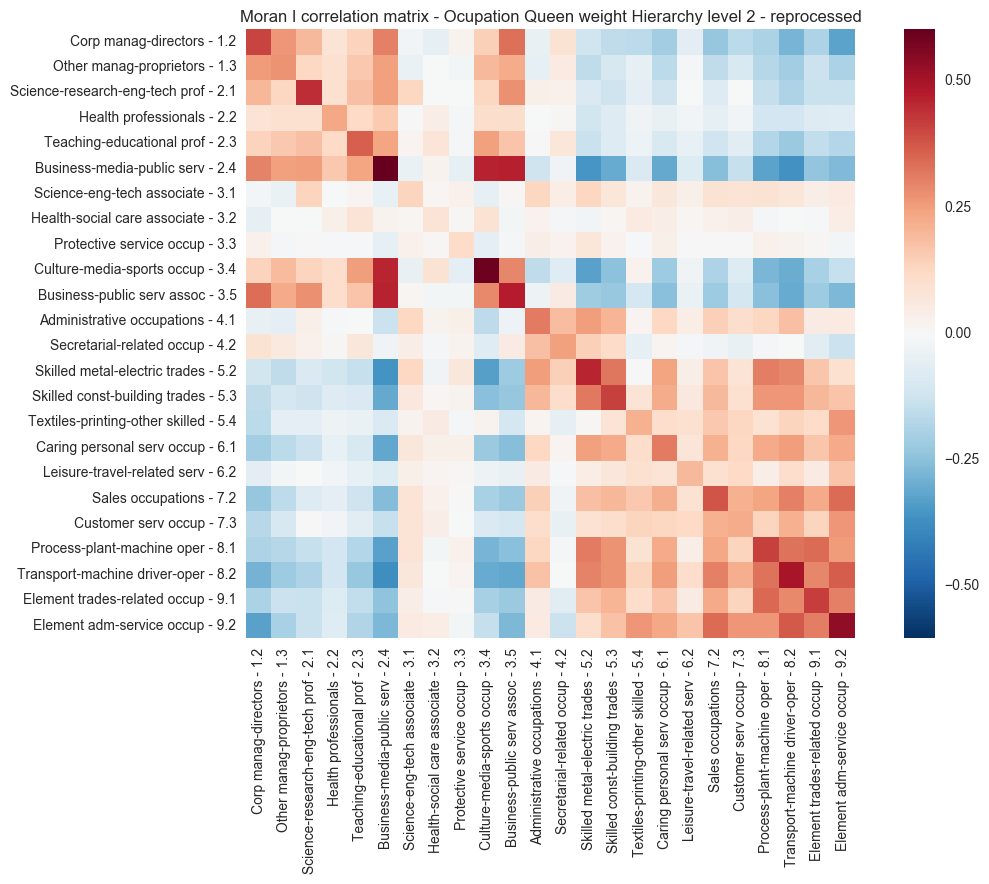

In [34]:
dfmoran_occup_rep2 = pd.DataFrame(matrices_occuprep2[0], columns=var_occup_repl2, index=var_occup_repl2)

# Plot Heatmap based on dfmoran_occup data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(12,9), dpi=300)
plt.title('Moran I correlation matrix - Ocupation Queen weight Hierarchy level 2 - reprocessed')
h1r = sns.heatmap(dfmoran_occup_rep2, square=True, xticklabels=labelsl2, yticklabels=labelsl2)
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_moran_hierl1.png")

**Moran Bivariate Queen weight for third hierarchy level**

In [35]:
var_occup_hier3 = list(hier_level3)
matrices_occupl3 = calc_moran_matrix(var_occup_hier3, weight_cont_occup, f2)

In [36]:
dfmoran_occup_hier3 = pd.DataFrame(matrices_occupl3[0], columns=var_occup_hier3, index=var_occup_hier3)
dfmoran_occup_hier3.head()

S606EW0004  S606EW0005  S606EW0006  S606EW0007  S606EW0008  \
S606EW0004    0.409724    0.069921    0.354204    0.304488   -0.057570   
S606EW0005    0.079998    0.316018    0.162400    0.062848    0.105987   
S606EW0006    0.362695    0.157685    0.513247    0.313447   -0.030016   
S606EW0007    0.308393    0.060575    0.314197    0.408946   -0.045607   
S606EW0008   -0.056292    0.107675   -0.029989   -0.047480    0.135972   

            S606EW0009  S606EW0010  S606EW0011  S606EW0014  S606EW0015  \
S606EW0004    0.004939   -0.003590    0.019617    0.093939   -0.031491   
S606EW0005    0.012917    0.030461    0.121228   -0.006415    0.059497   
S606EW0006    0.010801    0.038629    0.067171    0.124374   -0.014513   
S606EW0007   -0.005683   -0.001841    0.009797    0.051251   -0.026249   
S606EW0008    0.016574   -0.006447    0.059519   -0.033342    0.032025   

               ...      S606EW0112  S606EW0113  S606EW0117  S606EW0118  \
S606EW0004     ...       -0.121816   -0.114836   -0.124489   -0.128190   
S606EW0005     ...       -0.019725   -0.029042   -0.039060   -0.064502   
S606EW0006     ...       -0.181955   -0.147391   -0.180979   -0.202458   
S606EW0007     ...       -0.109710   -0.097136   -0.111928   -0.123388   
S606EW0008     ...        0.058957    0.102031    0.021794    0.041328   

            S606EW0120  S606EW0121  S606EW0122  S606EW0123  S606EW0124  \
S606EW0004   -0.160527   -0.175110   -0.172514   -0.117623   -0.175901   
S606EW0005   -0.065600   -0.188849   -0.172385   -0.036365   -0.075977   
S606EW0006   -0.208785   -0.287405   -0.262596   -0.166325   -0.264683   
S606EW0007   -0.127249   -0.196635   -0.159183   -0.099246   -0.169833   
S606EW0008    0.051649   -0.019770    0.011877    0.045937    0.084941   

            S606EW0125  
S606EW0004   -0.092325  
S606EW0005   -0.160691  
S606EW0006   -0.148032  
S606EW0007   -0.124658  
S606EW0008   -0.046410  

[5 rows x 85 columns]

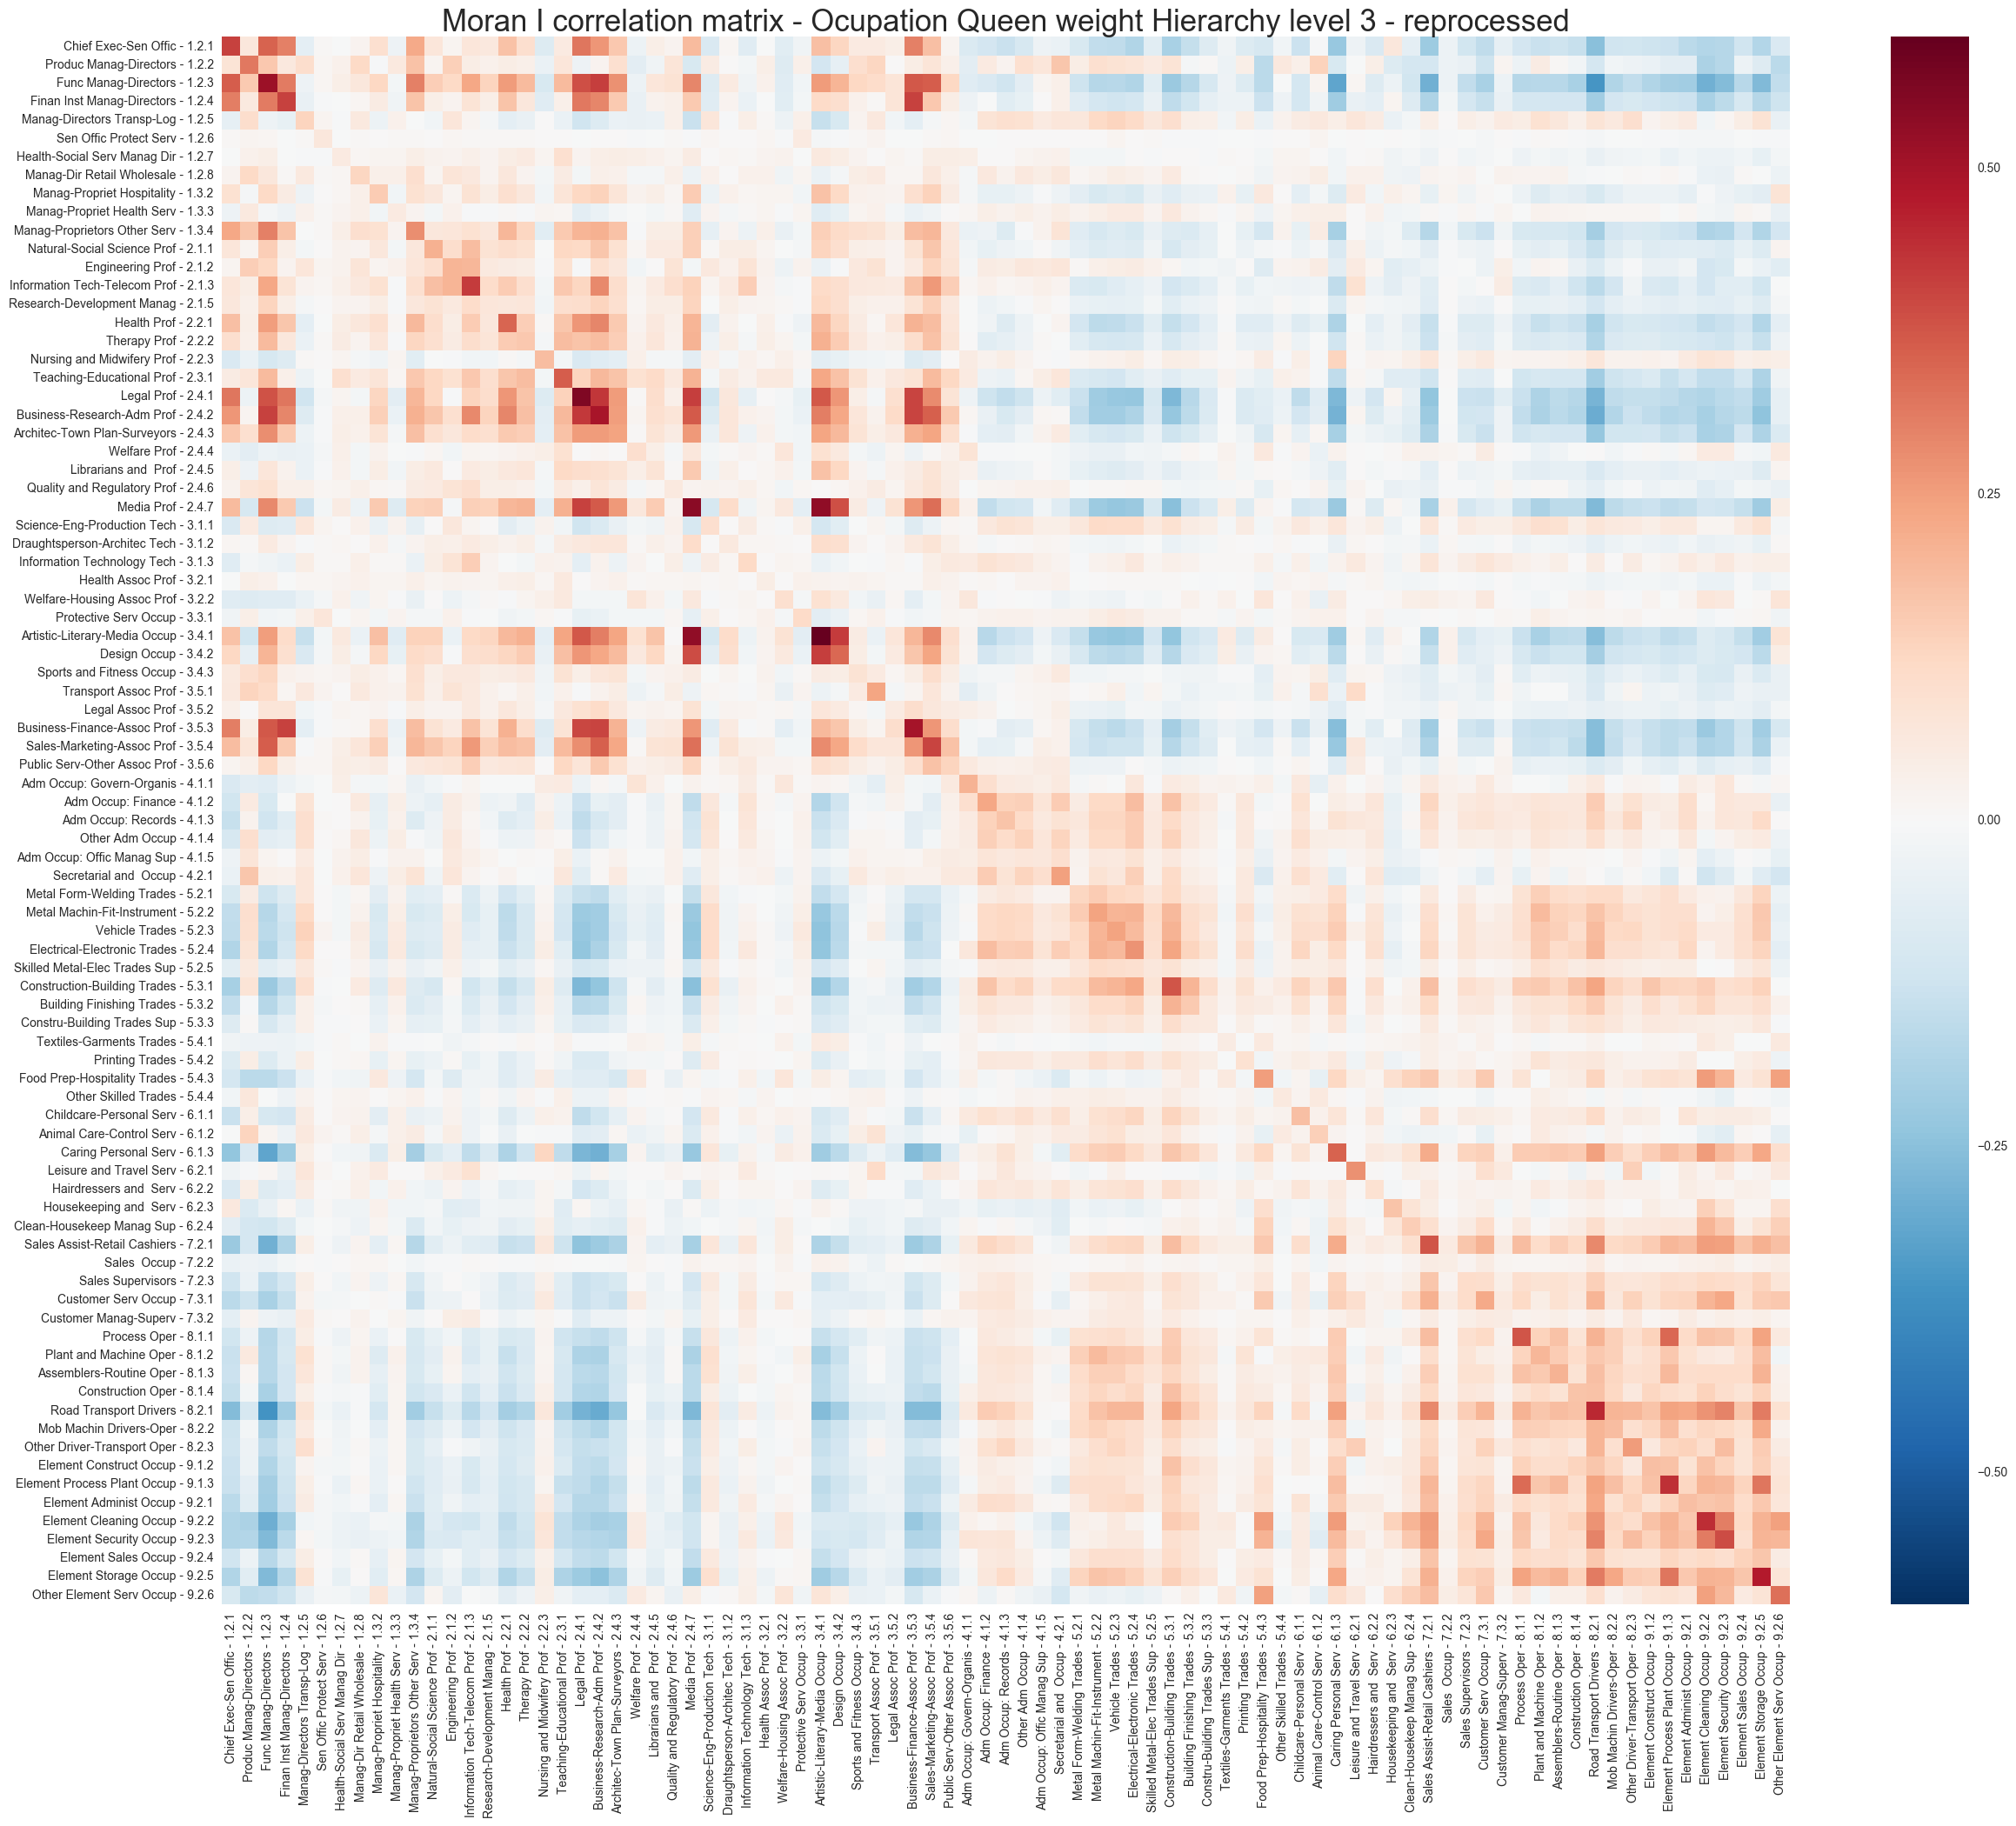

In [37]:
# Plot Heatmap based on dfmoran_occup data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(26, 21), dpi=300)
plt.title('Moran I correlation matrix - Ocupation Queen weight Hierarchy level 3 - reprocessed', fontsize=25)
h3 = sns.heatmap(dfmoran_occup_hier3, square=True, xticklabels=labelsl3, yticklabels=labelsl3)
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_moran_hierl3.png")